In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

# Unsupervised Learning

<img src="dcr.png" alt="title1" width="1150"/>

# Setup

In [6]:
from dcr import *
%matplotlib inline

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams.update({'font.size': 16})

# Synopsis

- Cluster Analysis
- Principal Component Analysis


# Cluster Analysis

- Cluster analysis is unsupervised learning

- Set of $n$ observations with $p$ features $x= (x_1,...,x_p)$ 
- Main interest is inferring properties of $x$
- No target or output variable $y$
- Grouping or segmentation of the observations into subsets (clusters) using the features $x$ according to similarity
 
 
 - K-Means clustering
 - Hierarchical clustering


## Properties of Distance Measures 

 Let $a$ and $b$ be two loan observations with features $x_a$ and $x_{b}$
 
 - $d(a,b)\geq 0$: distance should not be negative
 - $d(a,a)= 0$: self distance should be zero
 - $d(a,b)=d(b,a)$: equality of distances
 - $d(a,b)$ should increase for increasing dissimilarity of $a$ and $b$
 - $d(a,c)) \leq d(a,b)+d(b,c)$, i.e., the triangle inequality should hold


## Minkowski distance

\begin{align*}
		d(x_a,x_b) = \left[ \sum_{j=1}^p |x_{aj}-x_{bj}|^q \right]^{1/q}
\end{align*}	
$q=2$: Euclidean distance
\begin{align*}
d(x_a,x_b)& =\sqrt{(x_a-x_b)'(x_a-x_b)} \\
& = \sqrt{\sum_{j=1}^p (x_{aj}-x_{bj})^2}
\end{align*}


$q=1$: Manhattan  distance
\begin{align*}
d(x_a,x_{b}) = \sum_{j=1}^p |x_{aj}-x_{bj}|
\end{align*}


## K-Means Clustering 

Properties:

 - Features should be metric as we compute the cluster centers and appropriately scaled 
 - Number $k$ of clusters has to be given beforehand or varied on a trial-and-error basis (crossvalidation) 
 - Algorithm may not find the best solution as it also depends on starting values
 - Strong influence of outliers
 - Long computation times for large datasets

In [7]:
data1 = data.dropna(subset=['time', 'default_time','LTV_time', 'FICO_orig_time']).copy()

data1 = data1.loc[data['time']==60].copy()

X_train = data1[['FICO_orig_time', 'LTV_time']]
X_sample = X_train.sample(n=10, axis = 0, random_state=12345)

scaler = StandardScaler().fit(X_sample)
X_train_scaled = scaler.transform(X_sample)

# Change LTV sign
X_train_scaled[:,1]=-X_train_scaled[:,1]

print(X_train_scaled.round(2))

[[-0.85 -0.96]
 [-0.8   0.24]
 [ 0.07  0.51]
 [ 1.07 -0.5 ]
 [-0.11  2.34]
 [-0.6  -1.1 ]
 [ 0.32 -0.75]
 [-1.78 -0.79]
 [ 1.71  0.76]
 [ 0.98  0.26]]


In [8]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train_scaled)

KMeans(n_clusters=3)

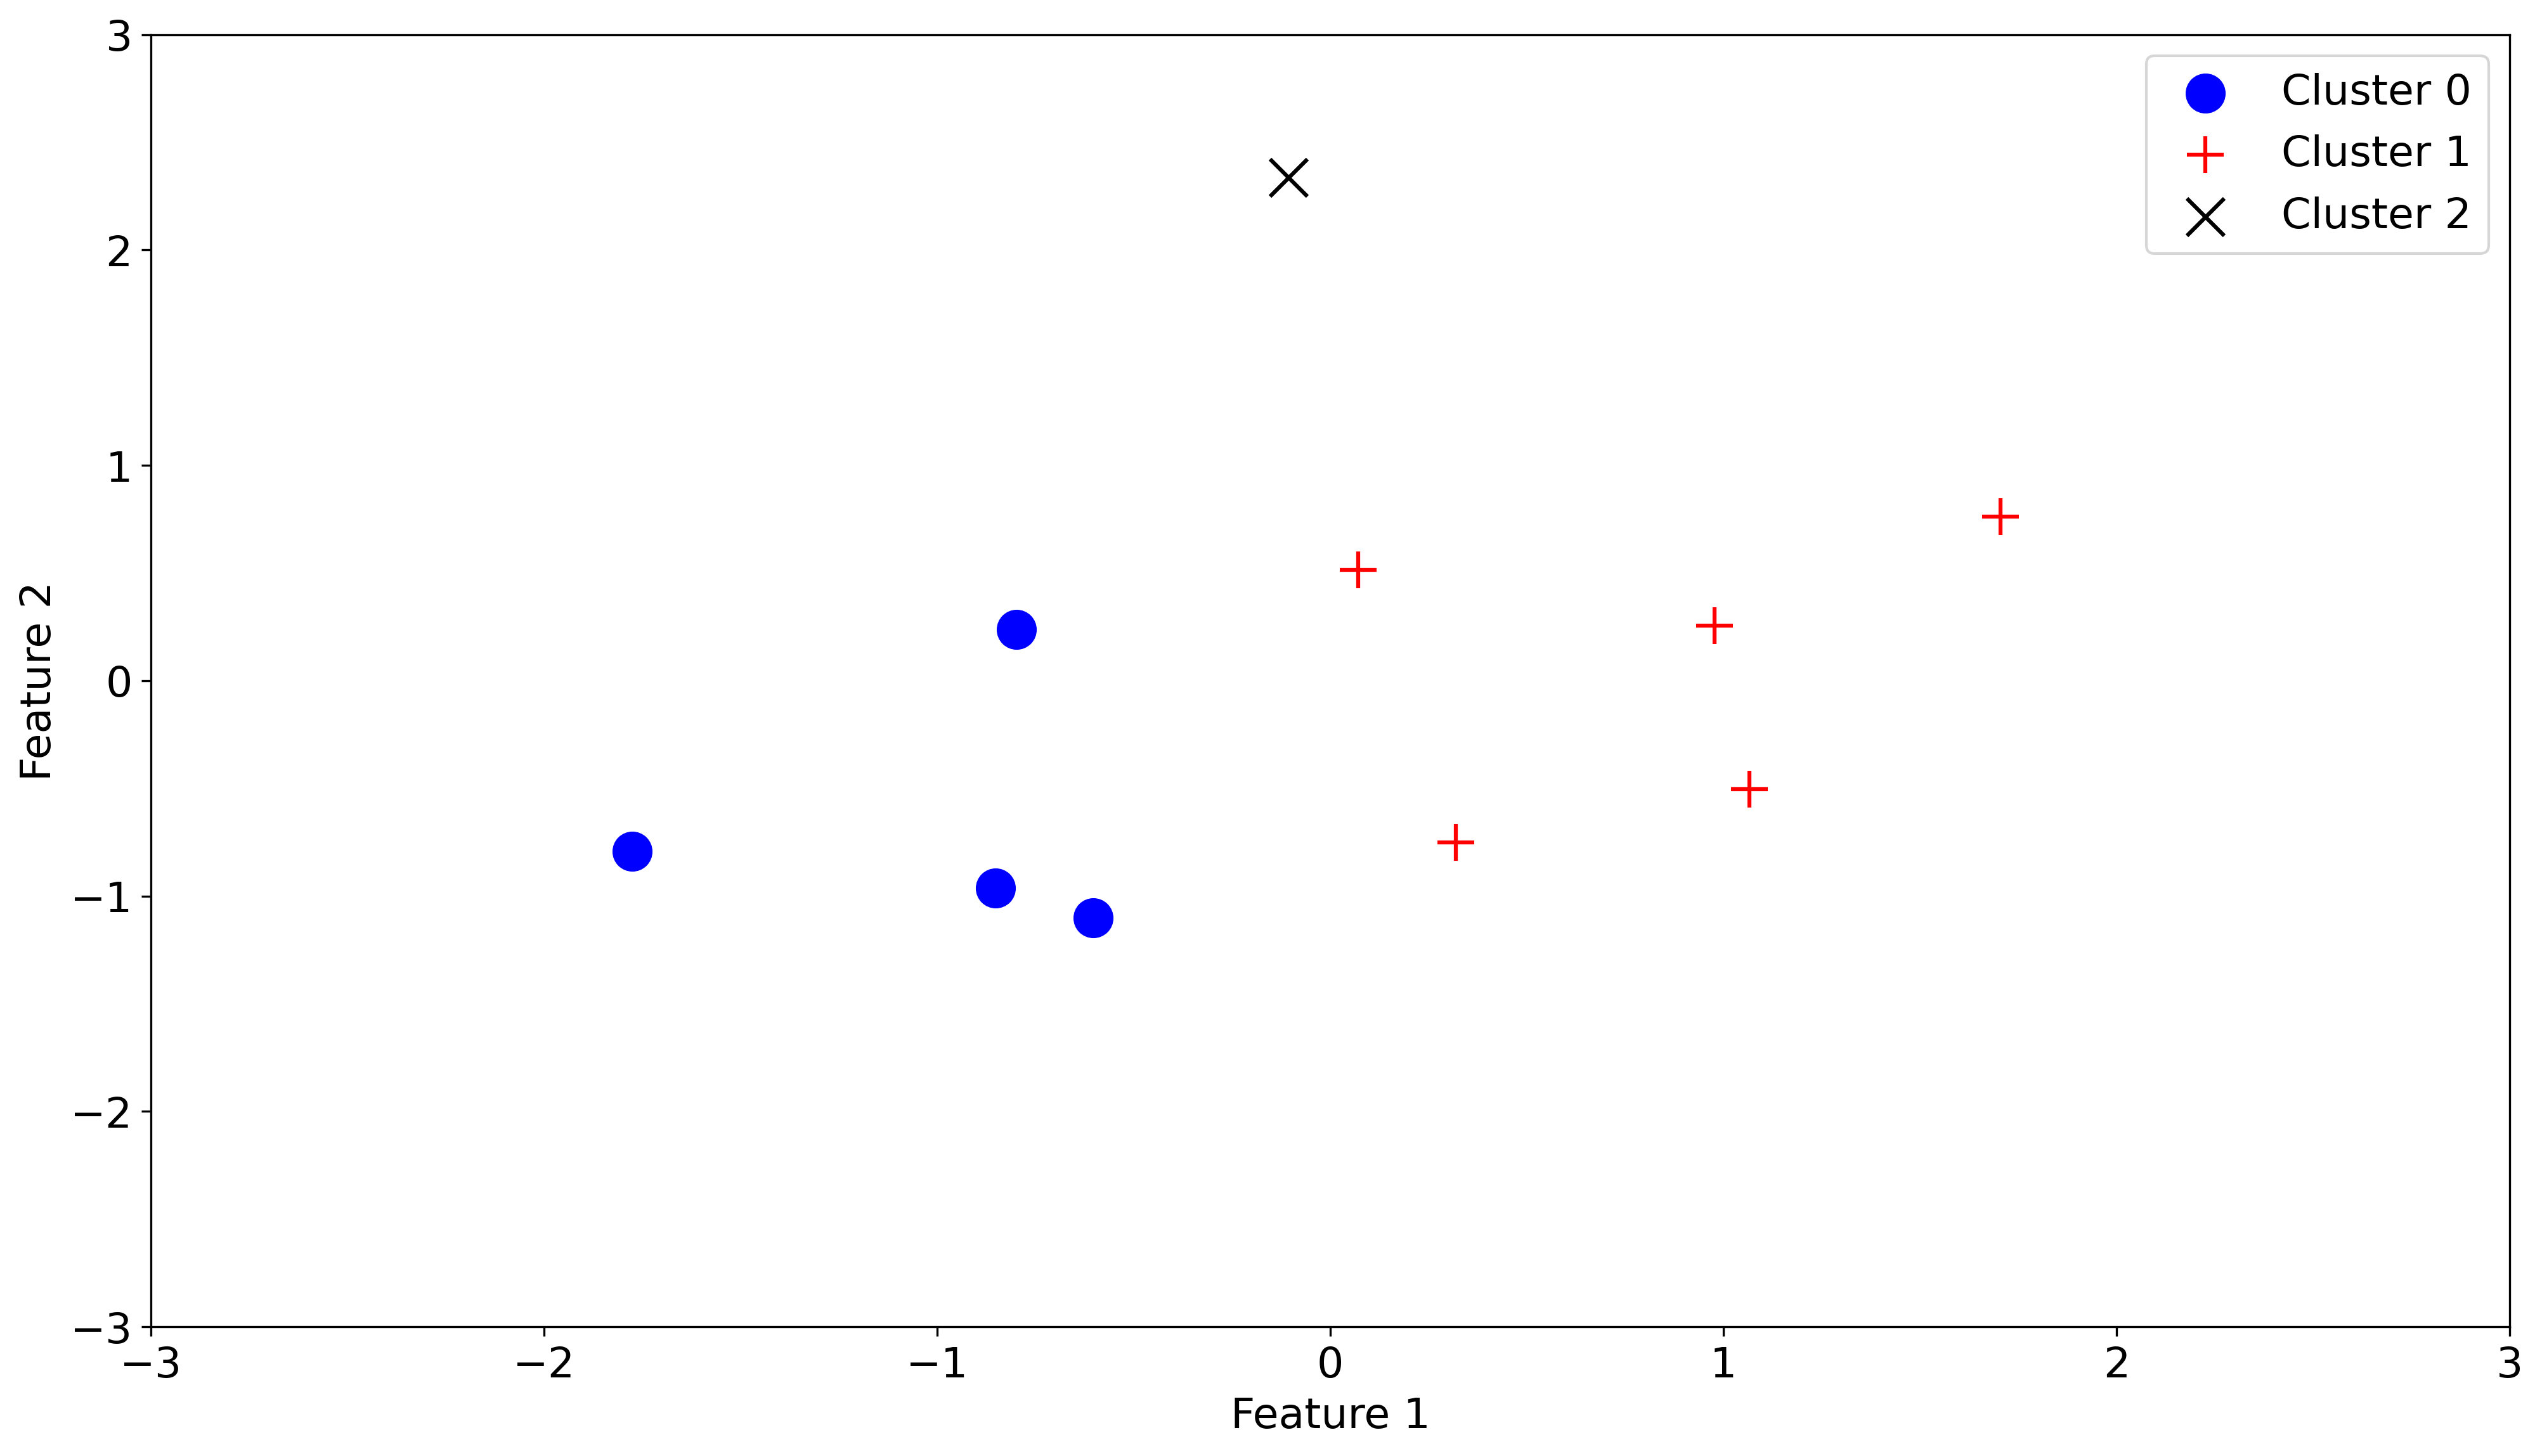

In [9]:
ref_0 = kmeans.labels_ == 0
ref_1 = kmeans.labels_ == 1
ref_2 = kmeans.labels_ == 2

X_train_scaled_0 = X_train_scaled[ref_0,:]
X_train_scaled_1 = X_train_scaled[ref_1,:]
X_train_scaled_2 = X_train_scaled[ref_2,:]

plt.scatter(X_train_scaled_0[:, 0], X_train_scaled_0[:, 1], c='blue', marker='o', s=200, label='Cluster 0')
plt.scatter(X_train_scaled_1[:, 0], X_train_scaled_1[:, 1], c='red', marker='+', s=200, label='Cluster 1')
plt.scatter(X_train_scaled_2[:, 0], X_train_scaled_2[:, 1], c='black', marker='x', s=200, label='Cluster 2')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.show()

### Elbow Criterion 

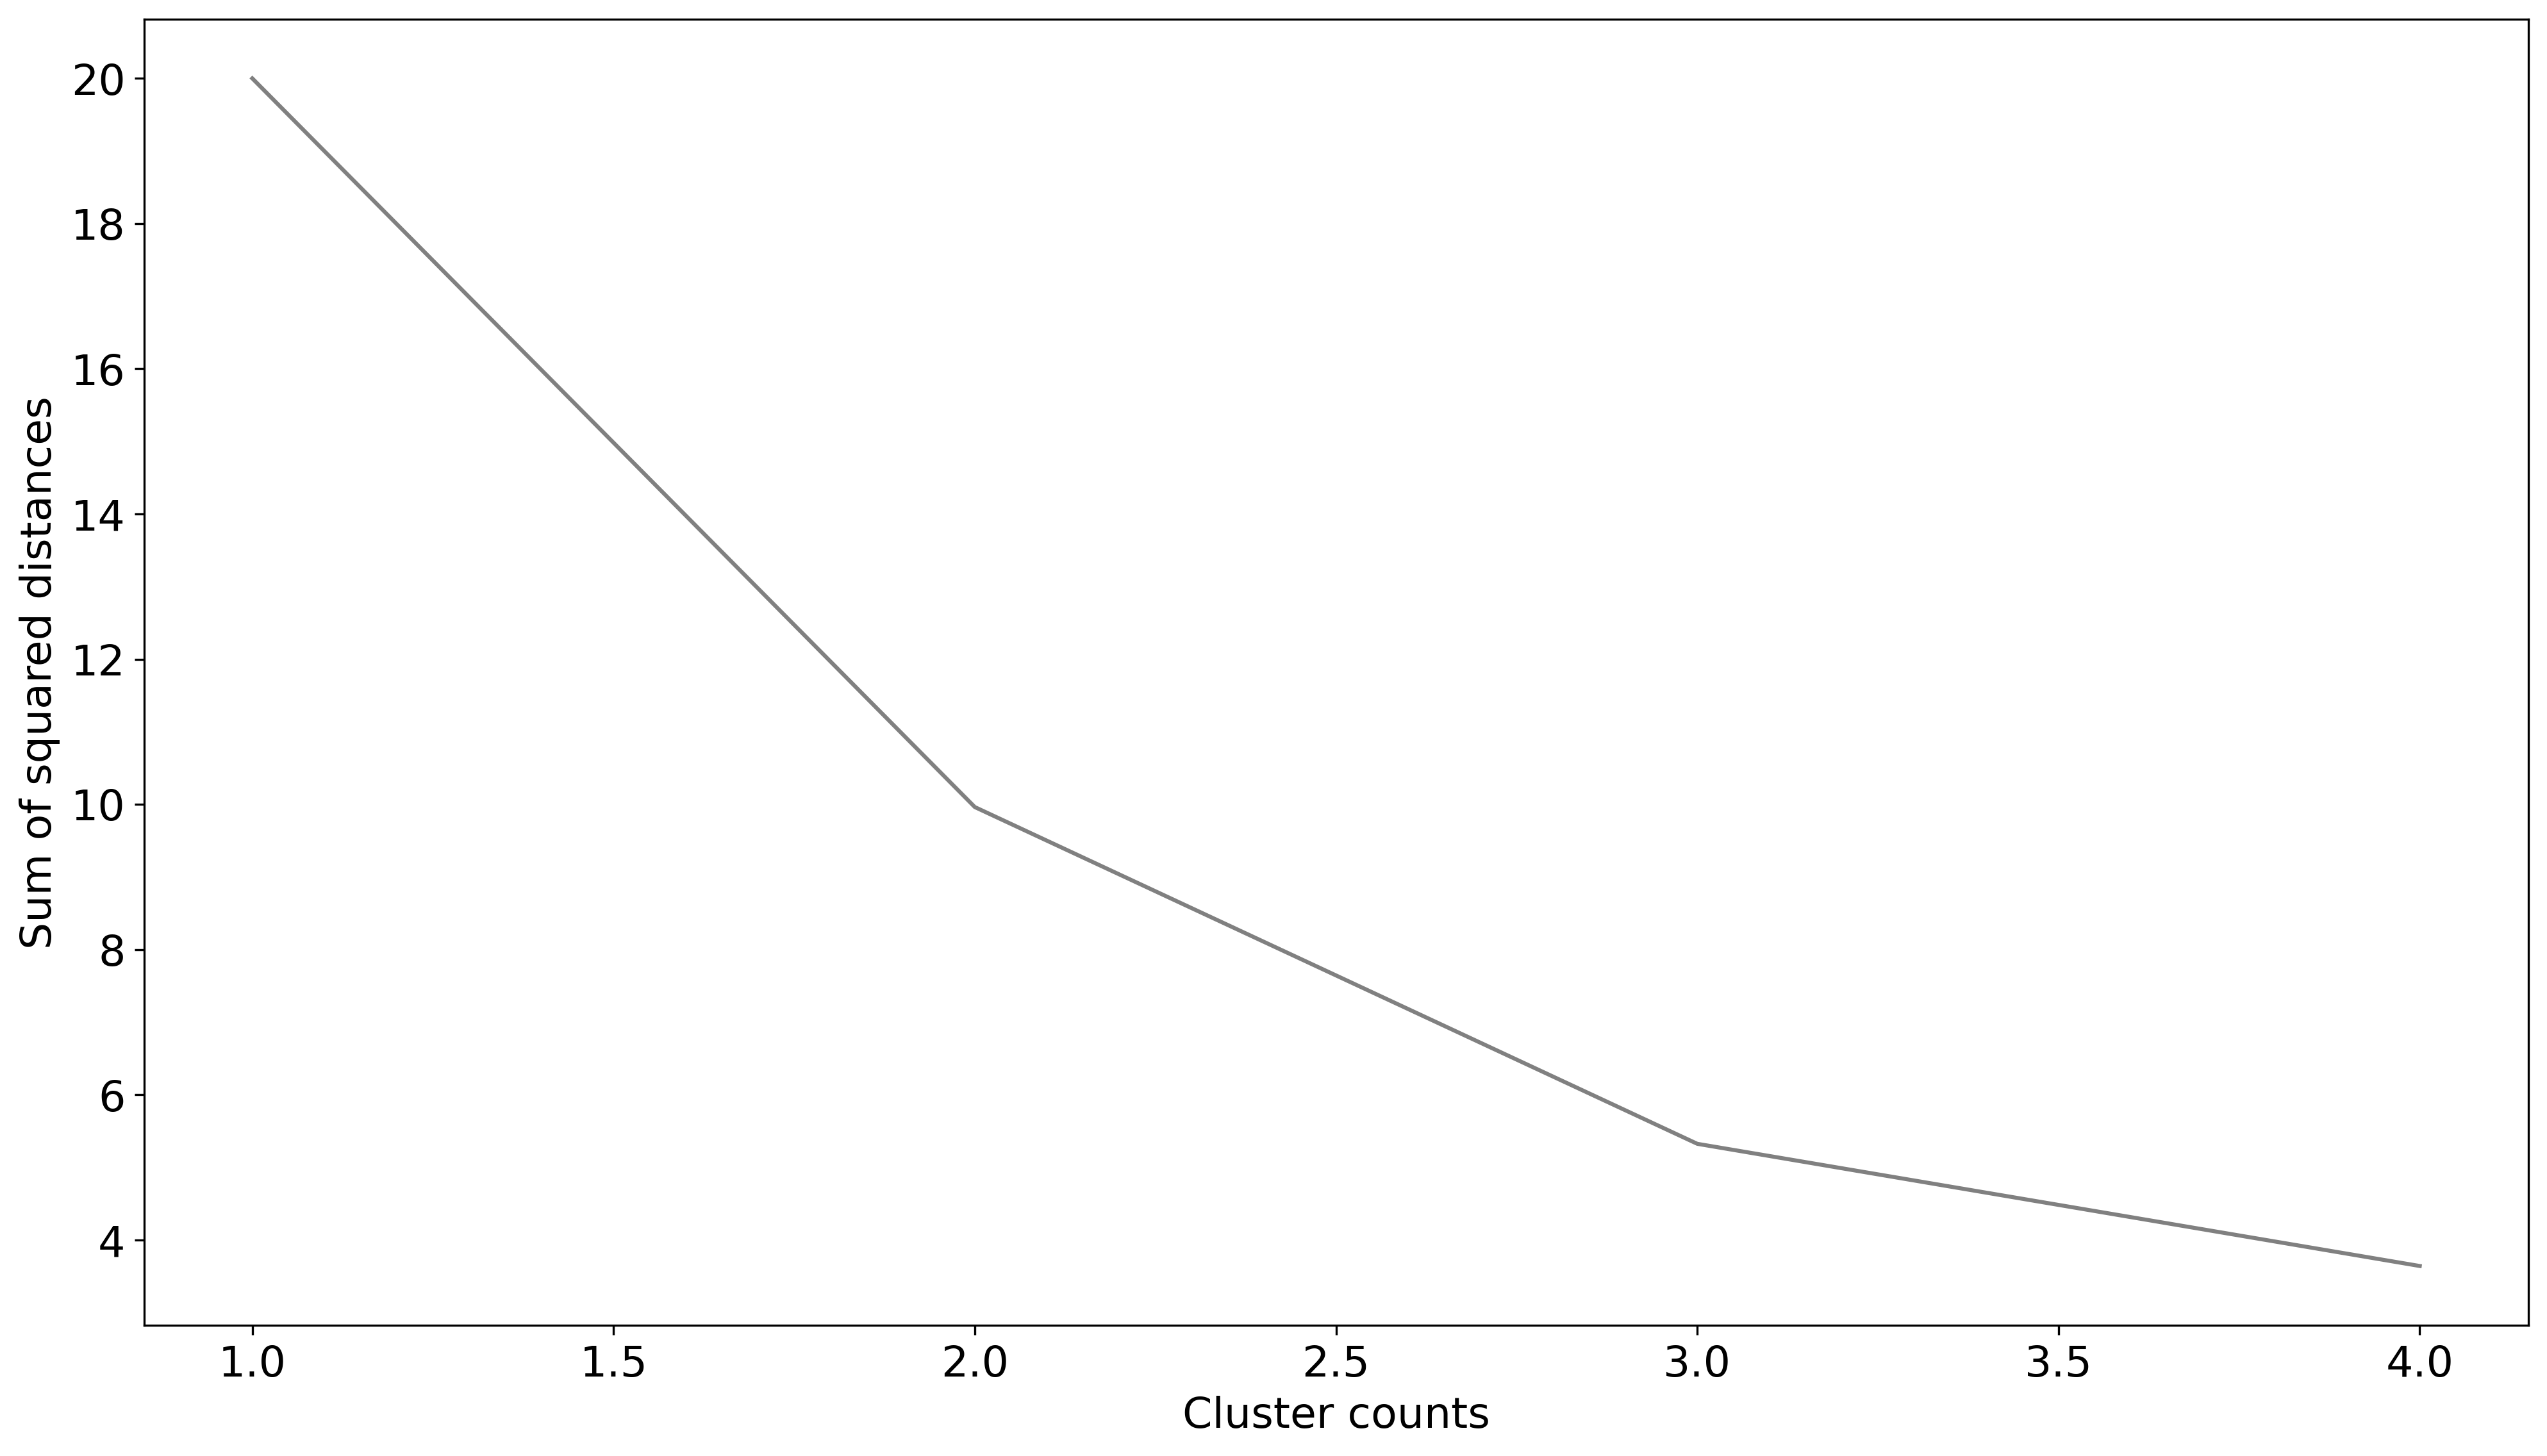

In [10]:
Nc = range(1, 5)
kmeans_Nc = [KMeans(n_clusters=i) for i in Nc]
score_Nc = [kmeans_Nc[i].fit(X_train_scaled).inertia_ for i in range(len(kmeans_Nc))]

plt.plot(Nc, score_Nc, color='gray')
plt.xlabel('Cluster counts')
plt.ylabel('Sum of squared distances')
plt.show()

## Hierarchical Clustering

- **Hierachical Clustering** groups the observations *consecutively* into clusters based on their distance. 
- First step: start with $n$ clusters and group those two observations into a cluster, which have the smallest distance
- Then, next distances depend on distance computation method


- **Nearest-Neighbor** or **Single-Linkage**: shortest distance between grouped observations in clusters
- **Farthest-Neighbor** or **Complete-Linkage**: largest distance between grouped observations in clusters
- **Centroid** or **Average Linkage**: average distance between grouped observations in clusters


### Nearest-Neighbor Clustering

In [11]:
pdist_x = pdist(X_train_scaled)

print(pdist_x.round(2))

[1.2  1.74 1.97 3.38 0.28 1.19 0.94 3.08 2.2  0.91 2.01 2.21 1.35 1.49
 1.42 2.56 1.78 1.42 1.83 1.75 1.29 2.26 1.65 0.94 3.07 1.77 0.79 2.86
 1.42 0.76 3.47 3.12 3.54 2.4  2.35 0.99 1.21 2.97 2.08 2.1  2.05 1.2
 3.81 2.95 0.89]


In [12]:
matrix = squareform(pdist_x)

print(matrix.round(2))

[[0.   1.2  1.74 1.97 3.38 0.28 1.19 0.94 3.08 2.2 ]
 [1.2  0.   0.91 2.01 2.21 1.35 1.49 1.42 2.56 1.78]
 [1.74 0.91 0.   1.42 1.83 1.75 1.29 2.26 1.65 0.94]
 [1.97 2.01 1.42 0.   3.07 1.77 0.79 2.86 1.42 0.76]
 [3.38 2.21 1.83 3.07 0.   3.47 3.12 3.54 2.4  2.35]
 [0.28 1.35 1.75 1.77 3.47 0.   0.99 1.21 2.97 2.08]
 [1.19 1.49 1.29 0.79 3.12 0.99 0.   2.1  2.05 1.2 ]
 [0.94 1.42 2.26 2.86 3.54 1.21 2.1  0.   3.81 2.95]
 [3.08 2.56 1.65 1.42 2.4  2.97 2.05 3.81 0.   0.89]
 [2.2  1.78 0.94 0.76 2.35 2.08 1.2  2.95 0.89 0.  ]]


[[ 0.    5.    0.28  2.  ]
 [ 3.    9.    0.76  2.  ]
 [ 6.   11.    0.79  3.  ]
 [ 8.   12.    0.89  4.  ]
 [ 1.    2.    0.91  2.  ]
 [ 7.   10.    0.94  3.  ]
 [13.   14.    0.94  6.  ]
 [15.   16.    0.99  9.  ]
 [ 4.   17.    1.83 10.  ]]


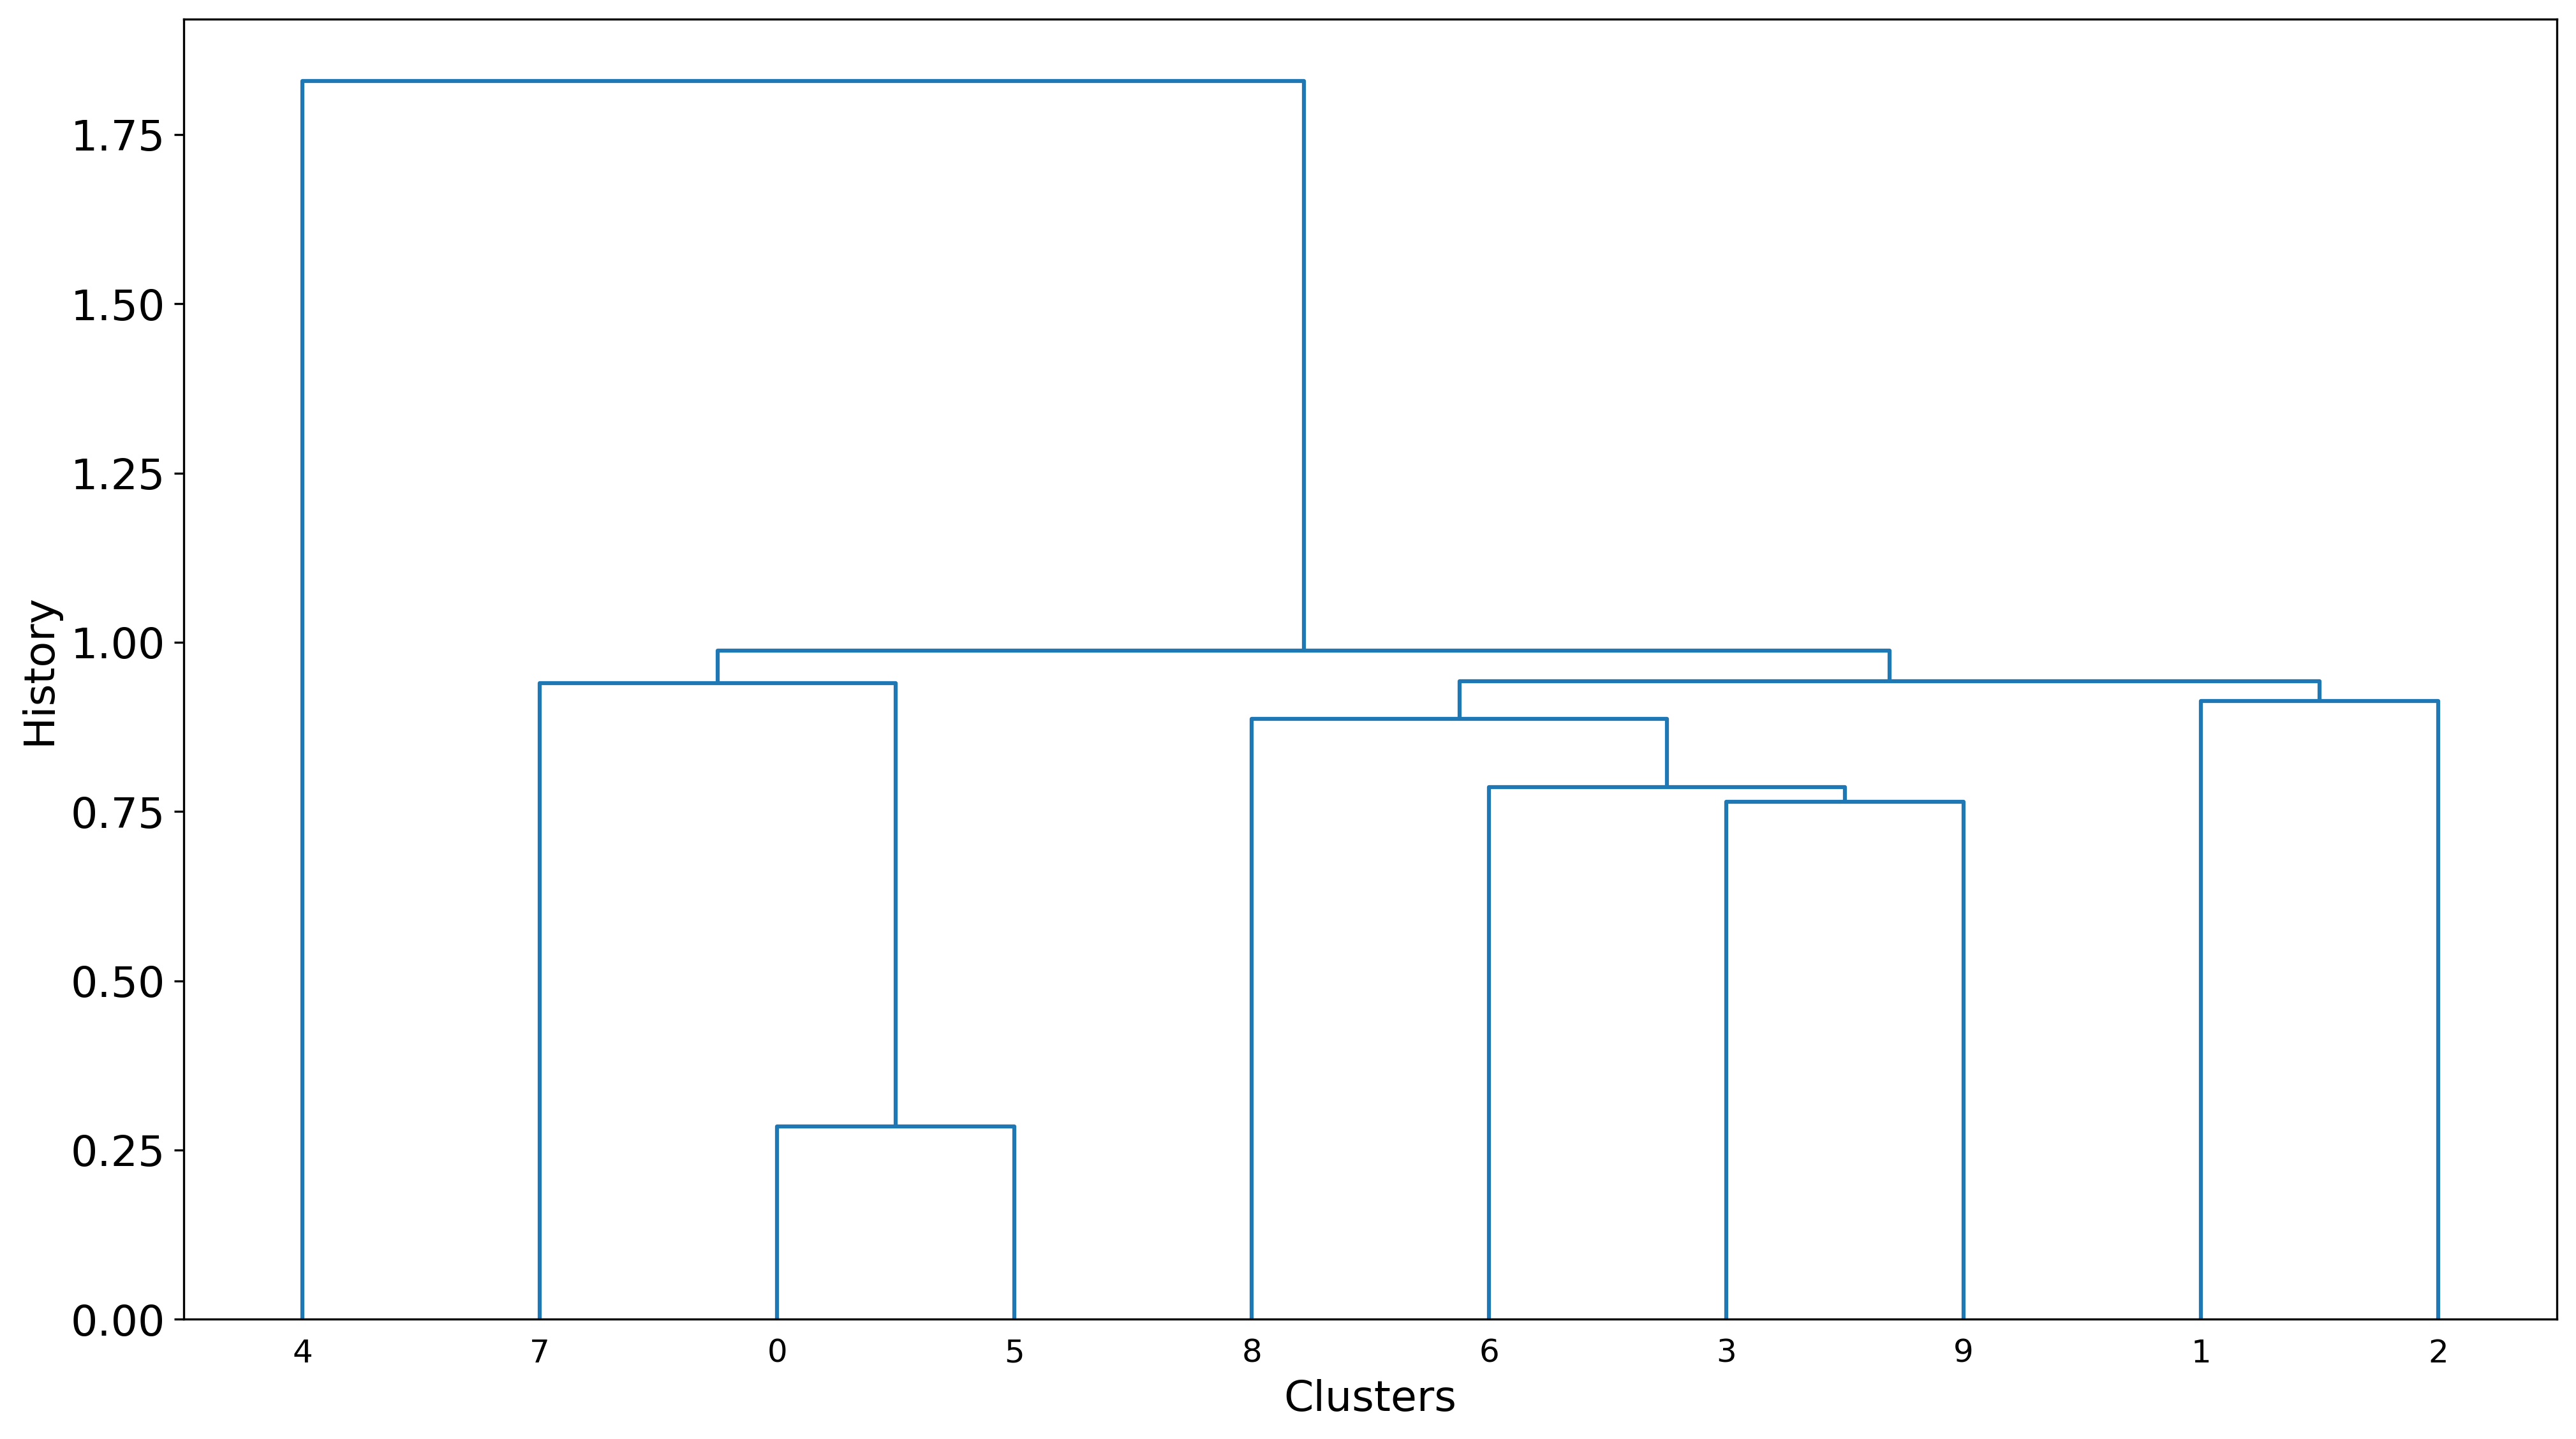

In [13]:
plt.figure()
plt.xticks(fontsize = 50)
Z = shc.linkage(X_train_scaled, method='single')

print(Z.round(2))

D_s = shc.dendrogram(Z,color_threshold=0.2,
no_labels=False)
agglo_s = AgglomerativeClustering(n_clusters=3, linkage='single')
agglo_s.fit(X_train_scaled)

plt.xlabel('Clusters')
plt.ylabel('History')
plt.show()

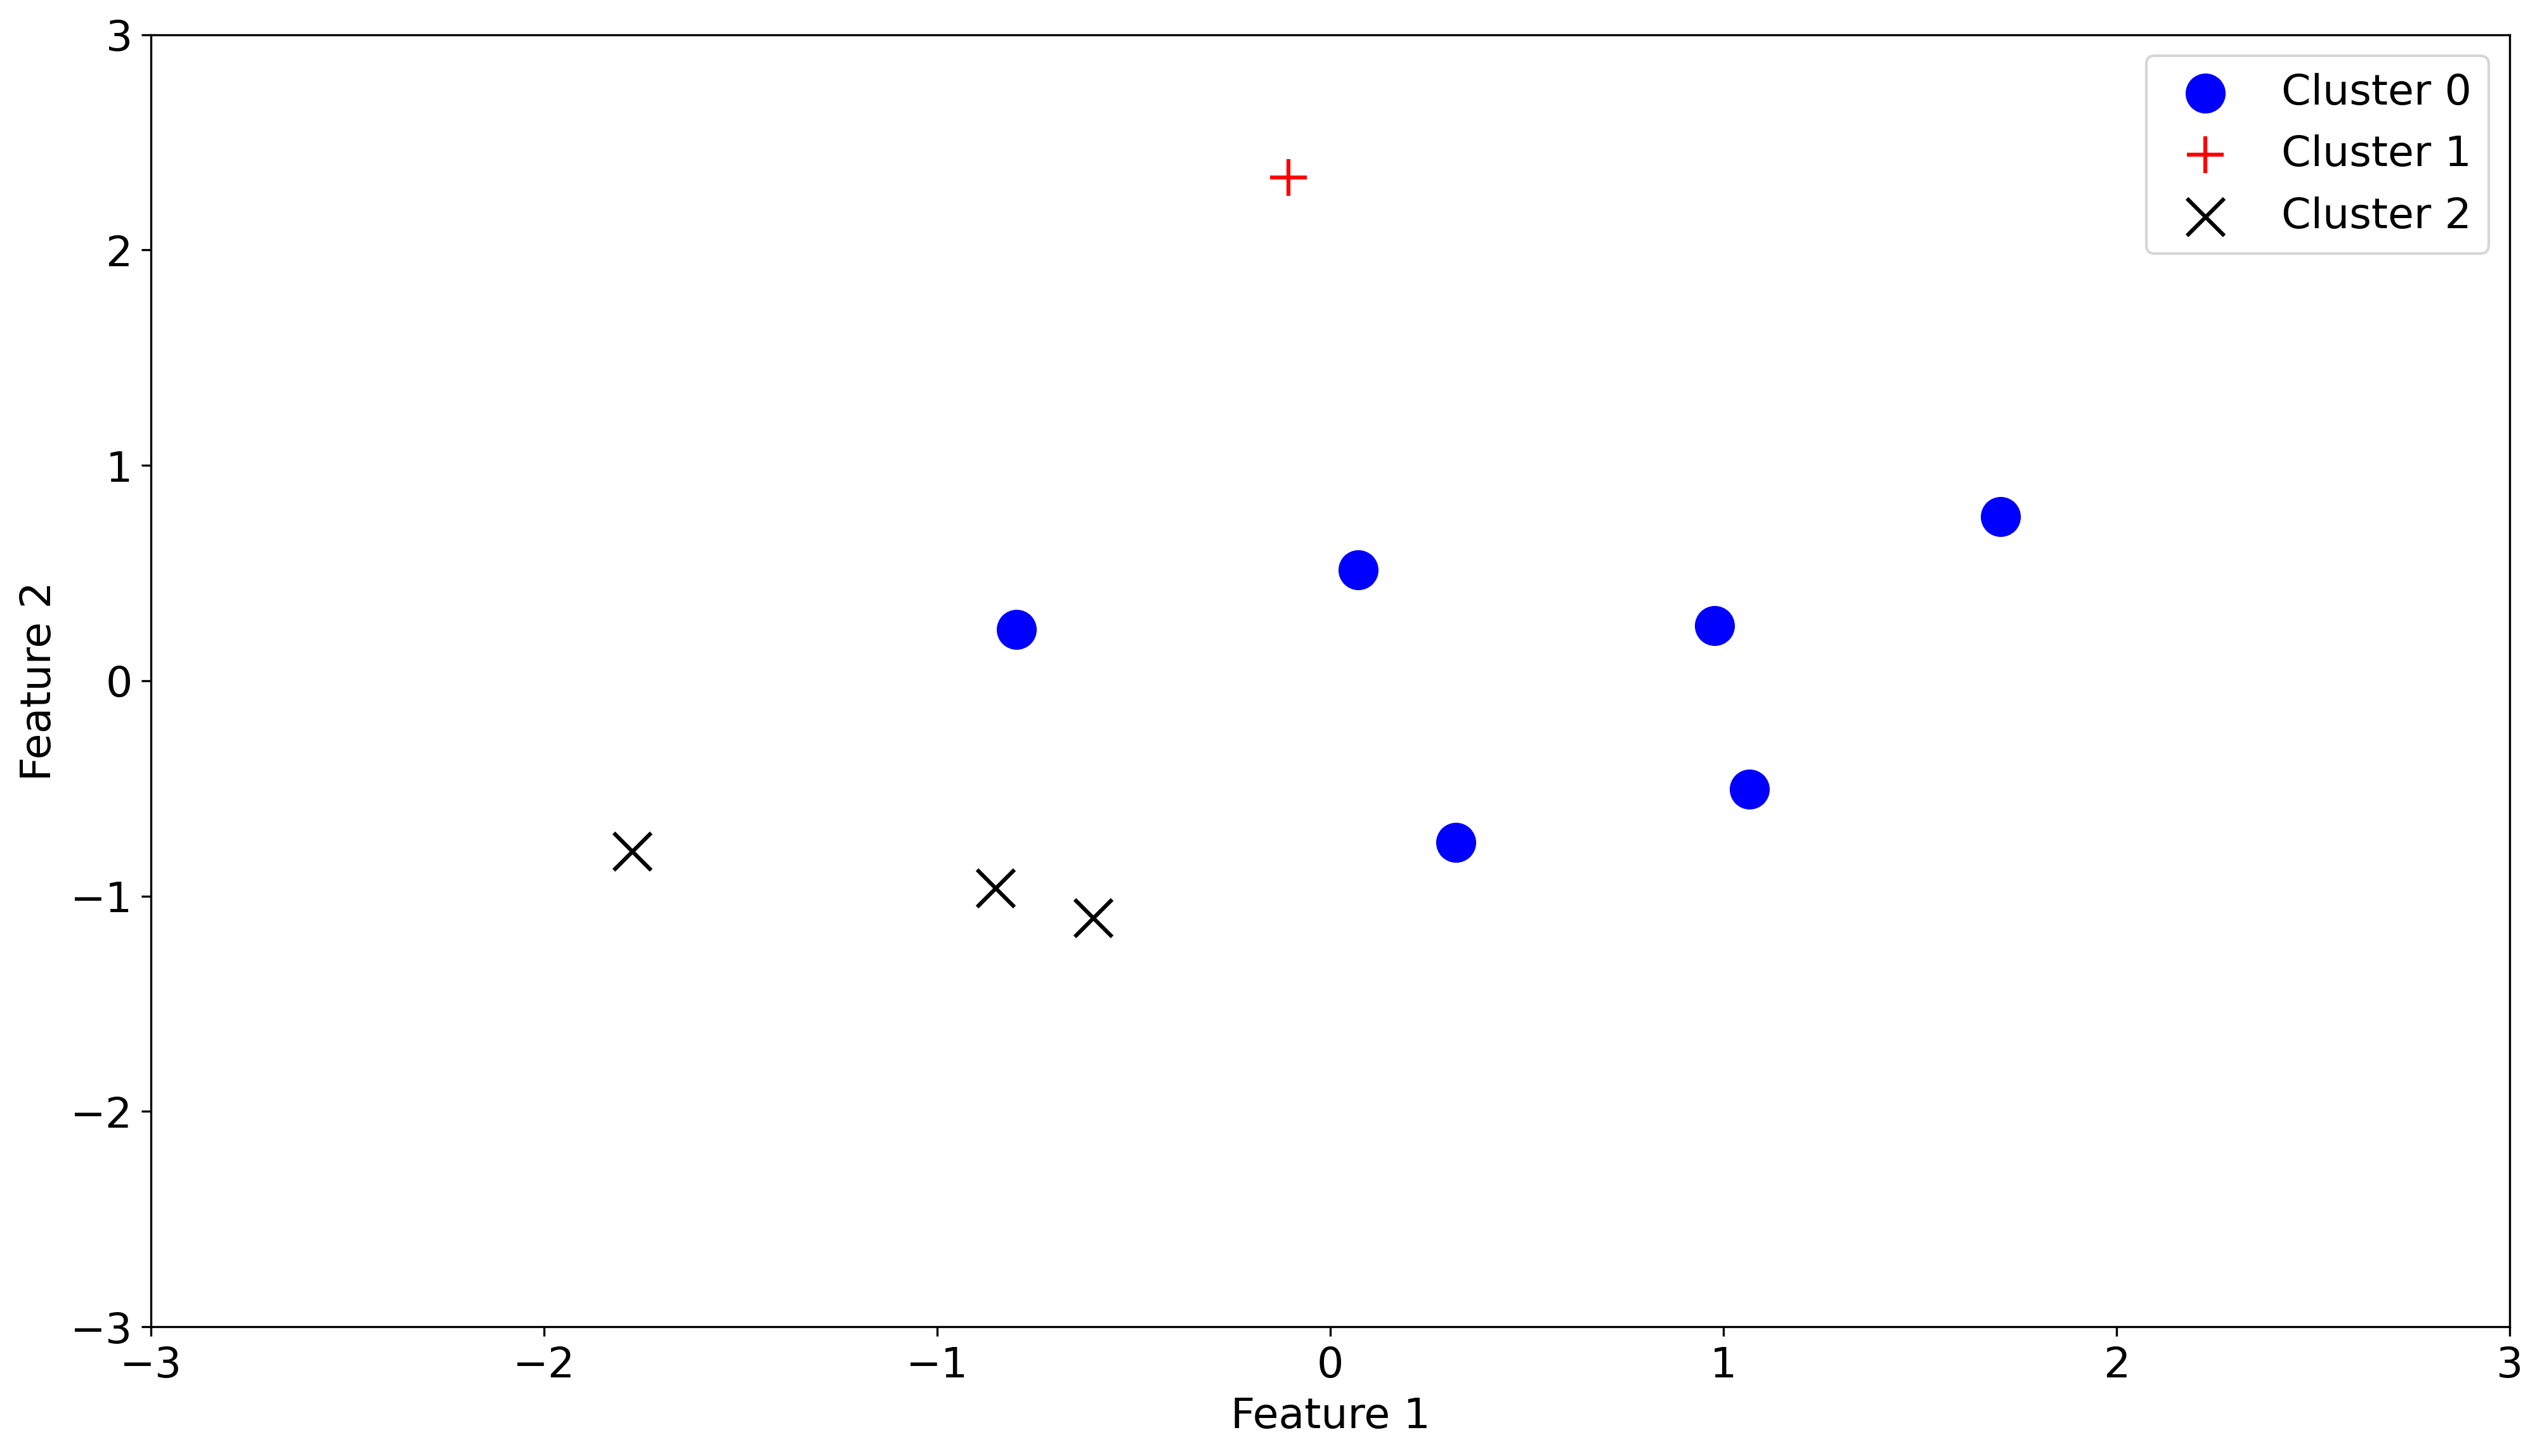

In [14]:
ref_0 = agglo_s.labels_ == 0
ref_1 = agglo_s.labels_ == 1
ref_2 = agglo_s.labels_ == 2

X_train_scaled_0 = X_train_scaled[ref_0,:]
X_train_scaled_1 = X_train_scaled[ref_1,:]
X_train_scaled_2 = X_train_scaled[ref_2,:]

plt.scatter(X_train_scaled_0[:, 0], X_train_scaled_0[:, 1], c='blue', marker='o', s=200, label='Cluster 0')
plt.scatter(X_train_scaled_1[:, 0], X_train_scaled_1[:, 1], c='red', marker='+', s=200, label='Cluster 1')
plt.scatter(X_train_scaled_2[:, 0], X_train_scaled_2[:, 1], c='black', marker='x', s=200, label='Cluster 2')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.show()


### Farthest-Neighbor Clustering

[[ 0.    5.    0.28  2.  ]
 [ 3.    9.    0.76  2.  ]
 [ 1.    2.    0.91  2.  ]
 [ 6.   10.    1.19  3.  ]
 [ 8.   11.    1.42  3.  ]
 [12.   13.    1.75  5.  ]
 [ 7.   15.    2.26  6.  ]
 [ 4.   14.    3.07  4.  ]
 [16.   17.    3.81 10.  ]]


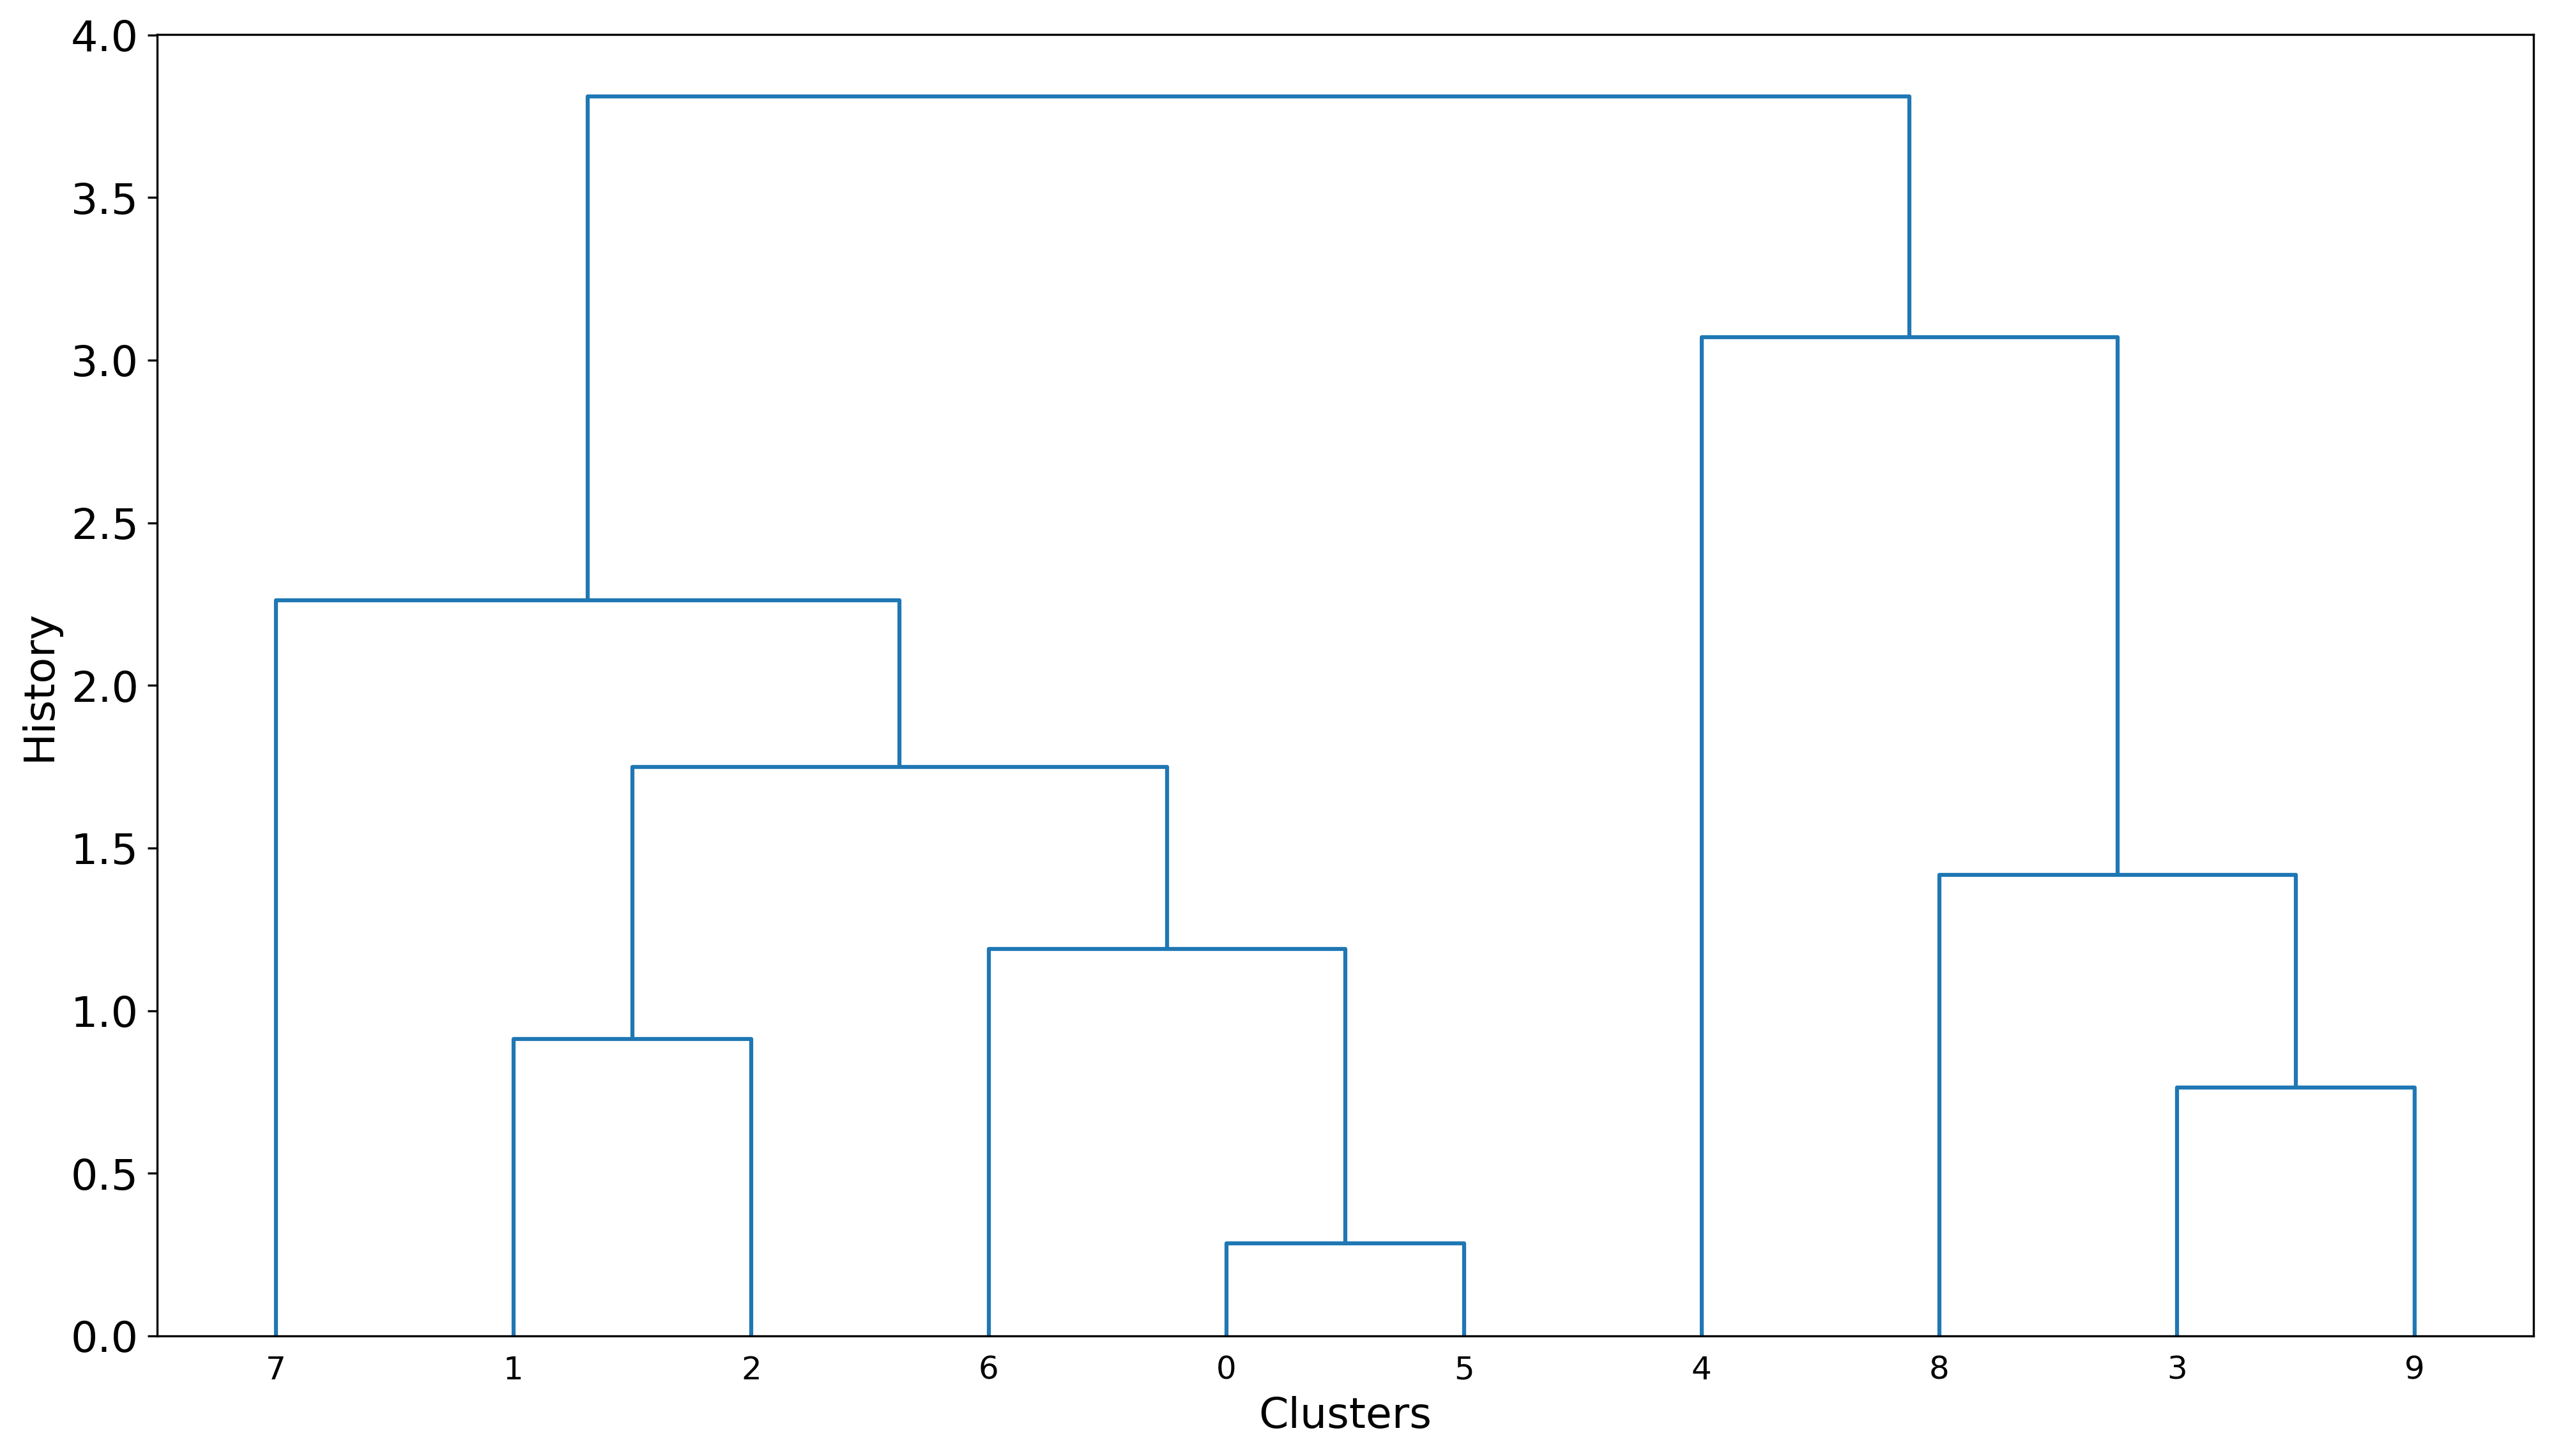

In [15]:
plt.figure()
plt.xticks(fontsize = 50)

Z = shc.linkage(X_train_scaled, method='complete')

print(Z.round(2))

D_c = shc.dendrogram(Z,color_threshold=0.2,no_labels=False)
agglo_c = AgglomerativeClustering(n_clusters=3, linkage='complete')
agglo_c.fit(X_train_scaled)

plt.xlabel('Clusters')
plt.ylabel('History')
plt.show()

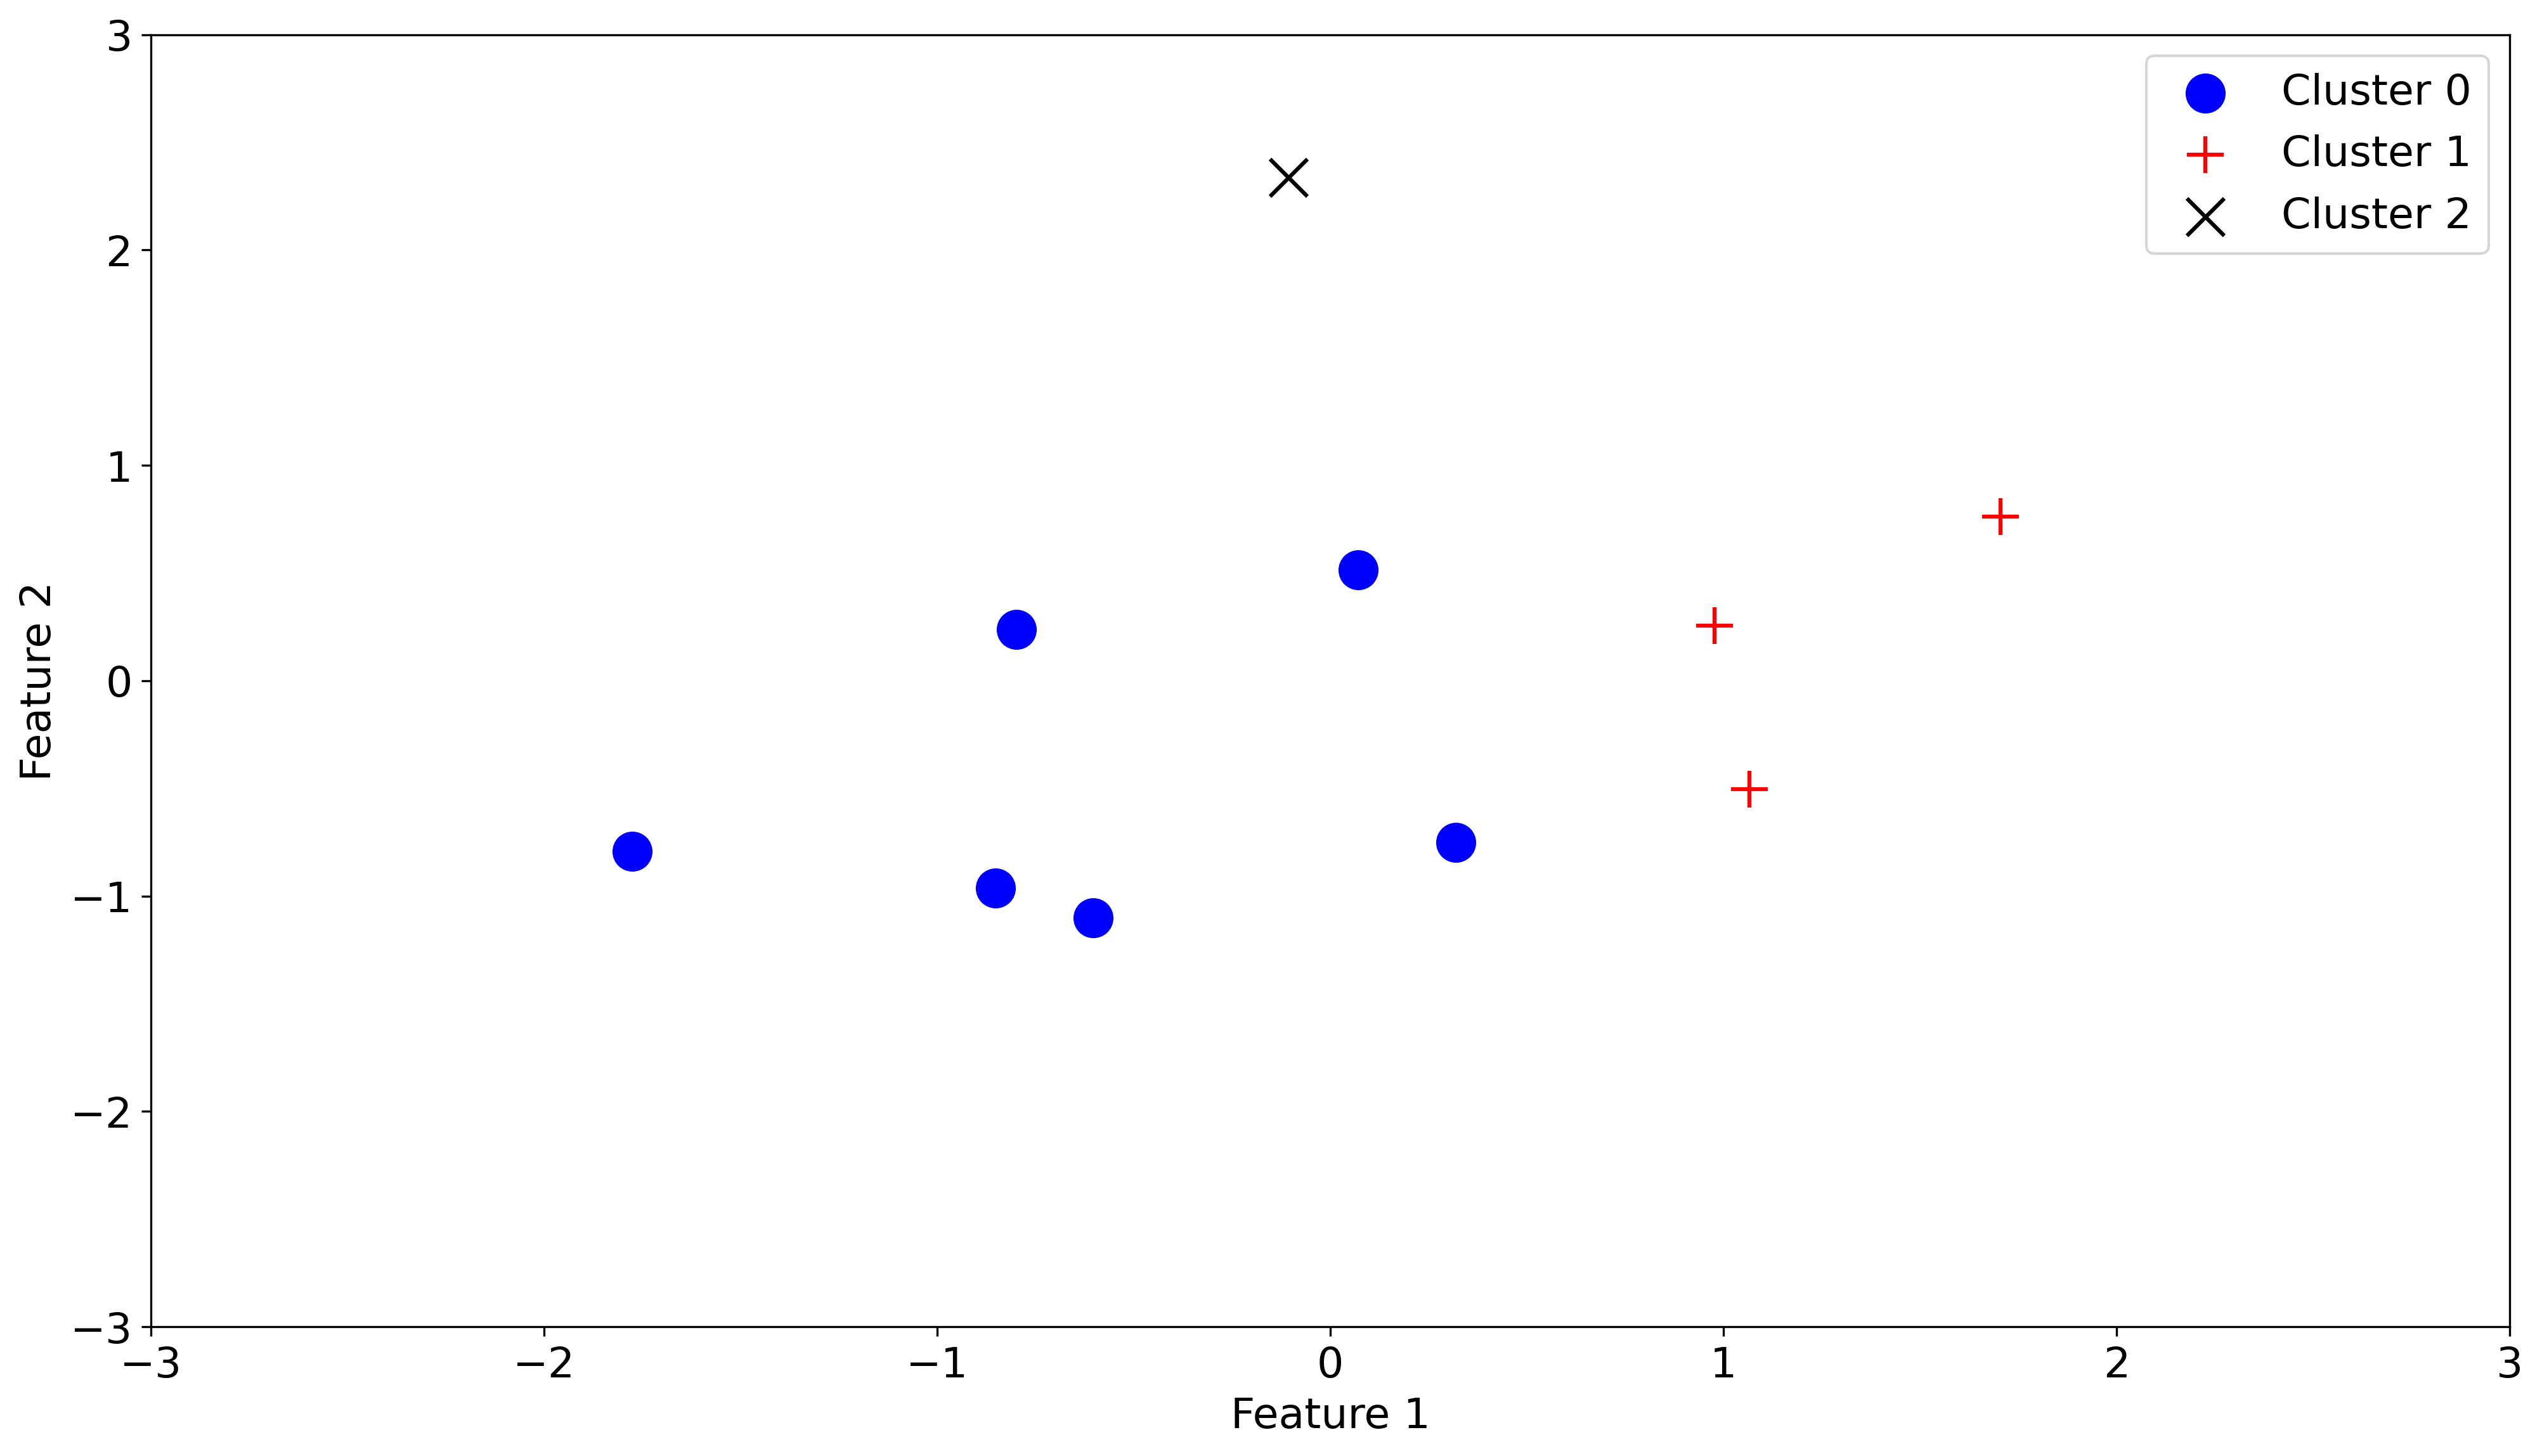

In [16]:
ref_0 = agglo_c.labels_ == 0
ref_1 = agglo_c.labels_ == 1
ref_2 = agglo_c.labels_ == 2

X_train_scaled_0 = X_train_scaled[ref_0,:]
X_train_scaled_1 = X_train_scaled[ref_1,:]
X_train_scaled_2 = X_train_scaled[ref_2,:]

plt.scatter(X_train_scaled_0[:, 0], X_train_scaled_0[:, 1], c='blue', marker='o', s=200, label='Cluster 0')
plt.scatter(X_train_scaled_1[:, 0], X_train_scaled_1[:, 1], c='red', marker='+', s=200, label='Cluster 1')
plt.scatter(X_train_scaled_2[:, 0], X_train_scaled_2[:, 1], c='black', marker='x', s=200, label='Cluster 2')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.show()

### Centroid Clustering


[[ 0.    5.    0.28  2.  ]
 [ 3.    9.    0.76  2.  ]
 [ 1.    2.    0.91  2.  ]
 [ 6.   11.    0.99  3.  ]
 [ 7.   10.    1.08  3.  ]
 [ 8.   13.    1.45  4.  ]
 [12.   14.    1.62  5.  ]
 [15.   16.    2.06  9.  ]
 [ 4.   17.    2.82 10.  ]]


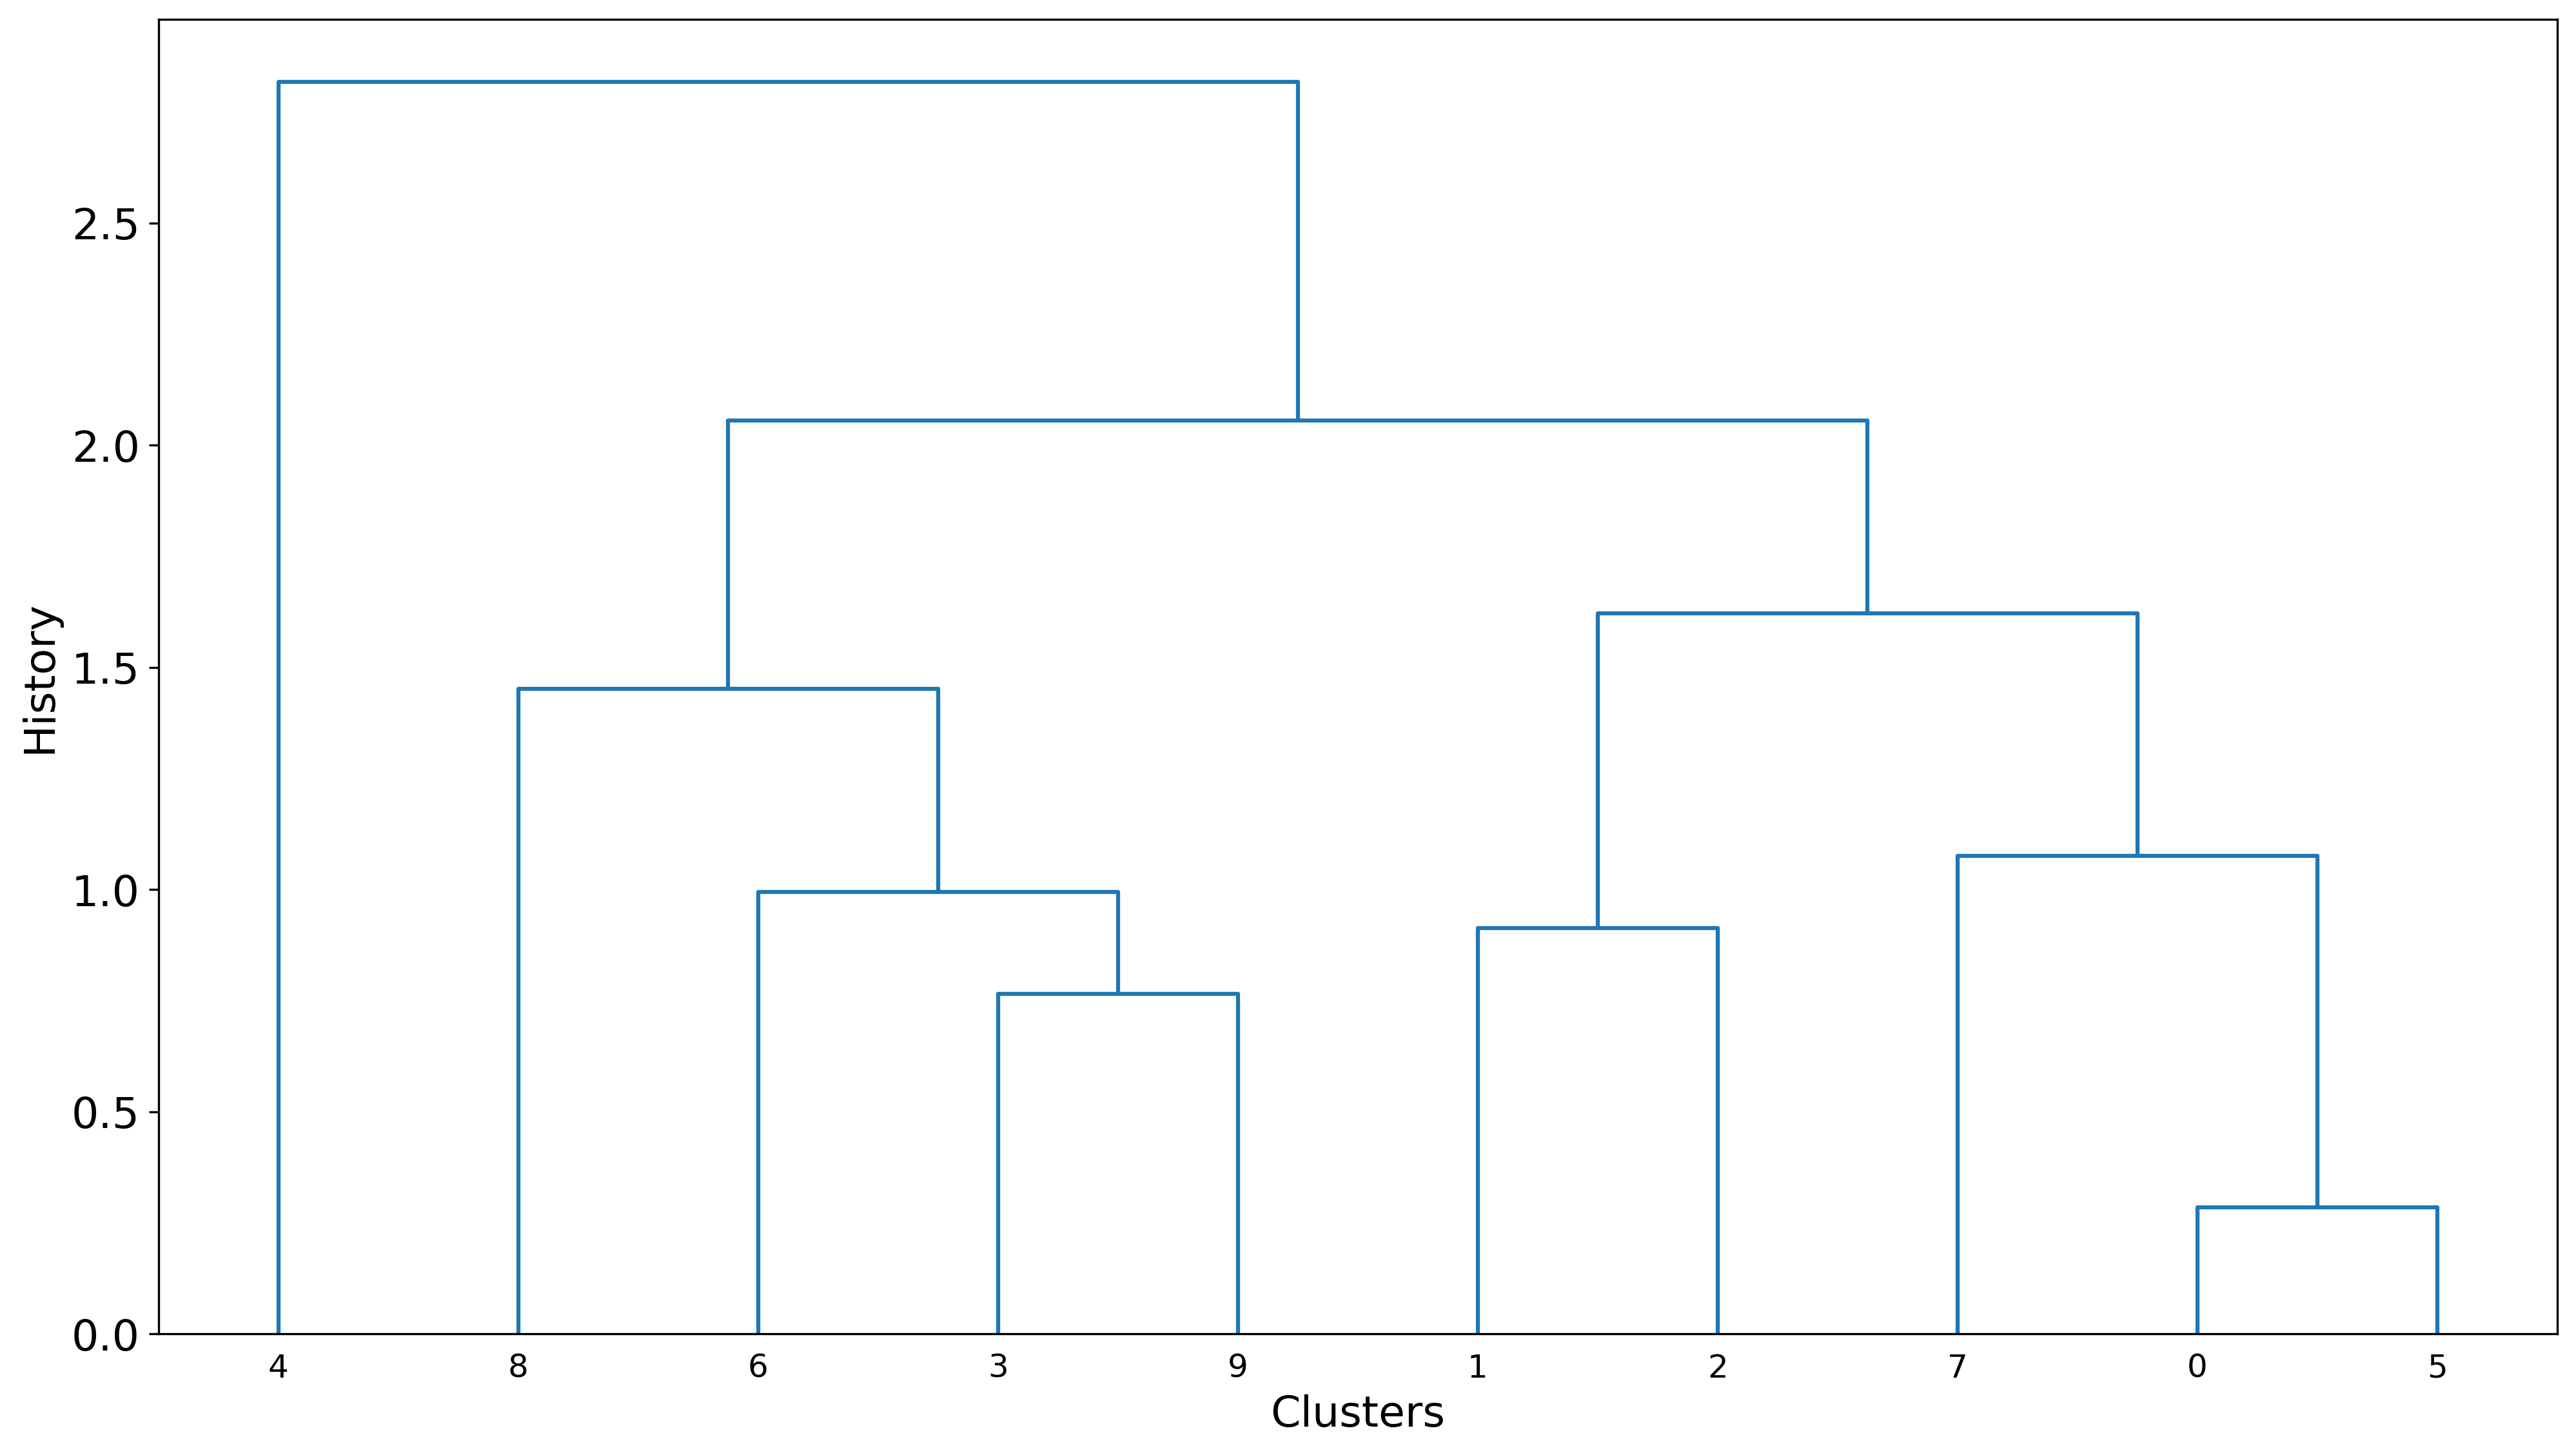

In [18]:
plt.figure()
plt.xticks(fontsize = 50)
Z = shc.linkage(X_train_scaled, method='average')

print(Z.round(2))

D_a = shc.dendrogram(Z,color_threshold=0.2,
no_labels=False)
agglo_a = AgglomerativeClustering(n_clusters=3, linkage='average')
agglo_a.fit(X_train_scaled)

plt.xlabel('Clusters')
plt.ylabel('History')
plt.show()

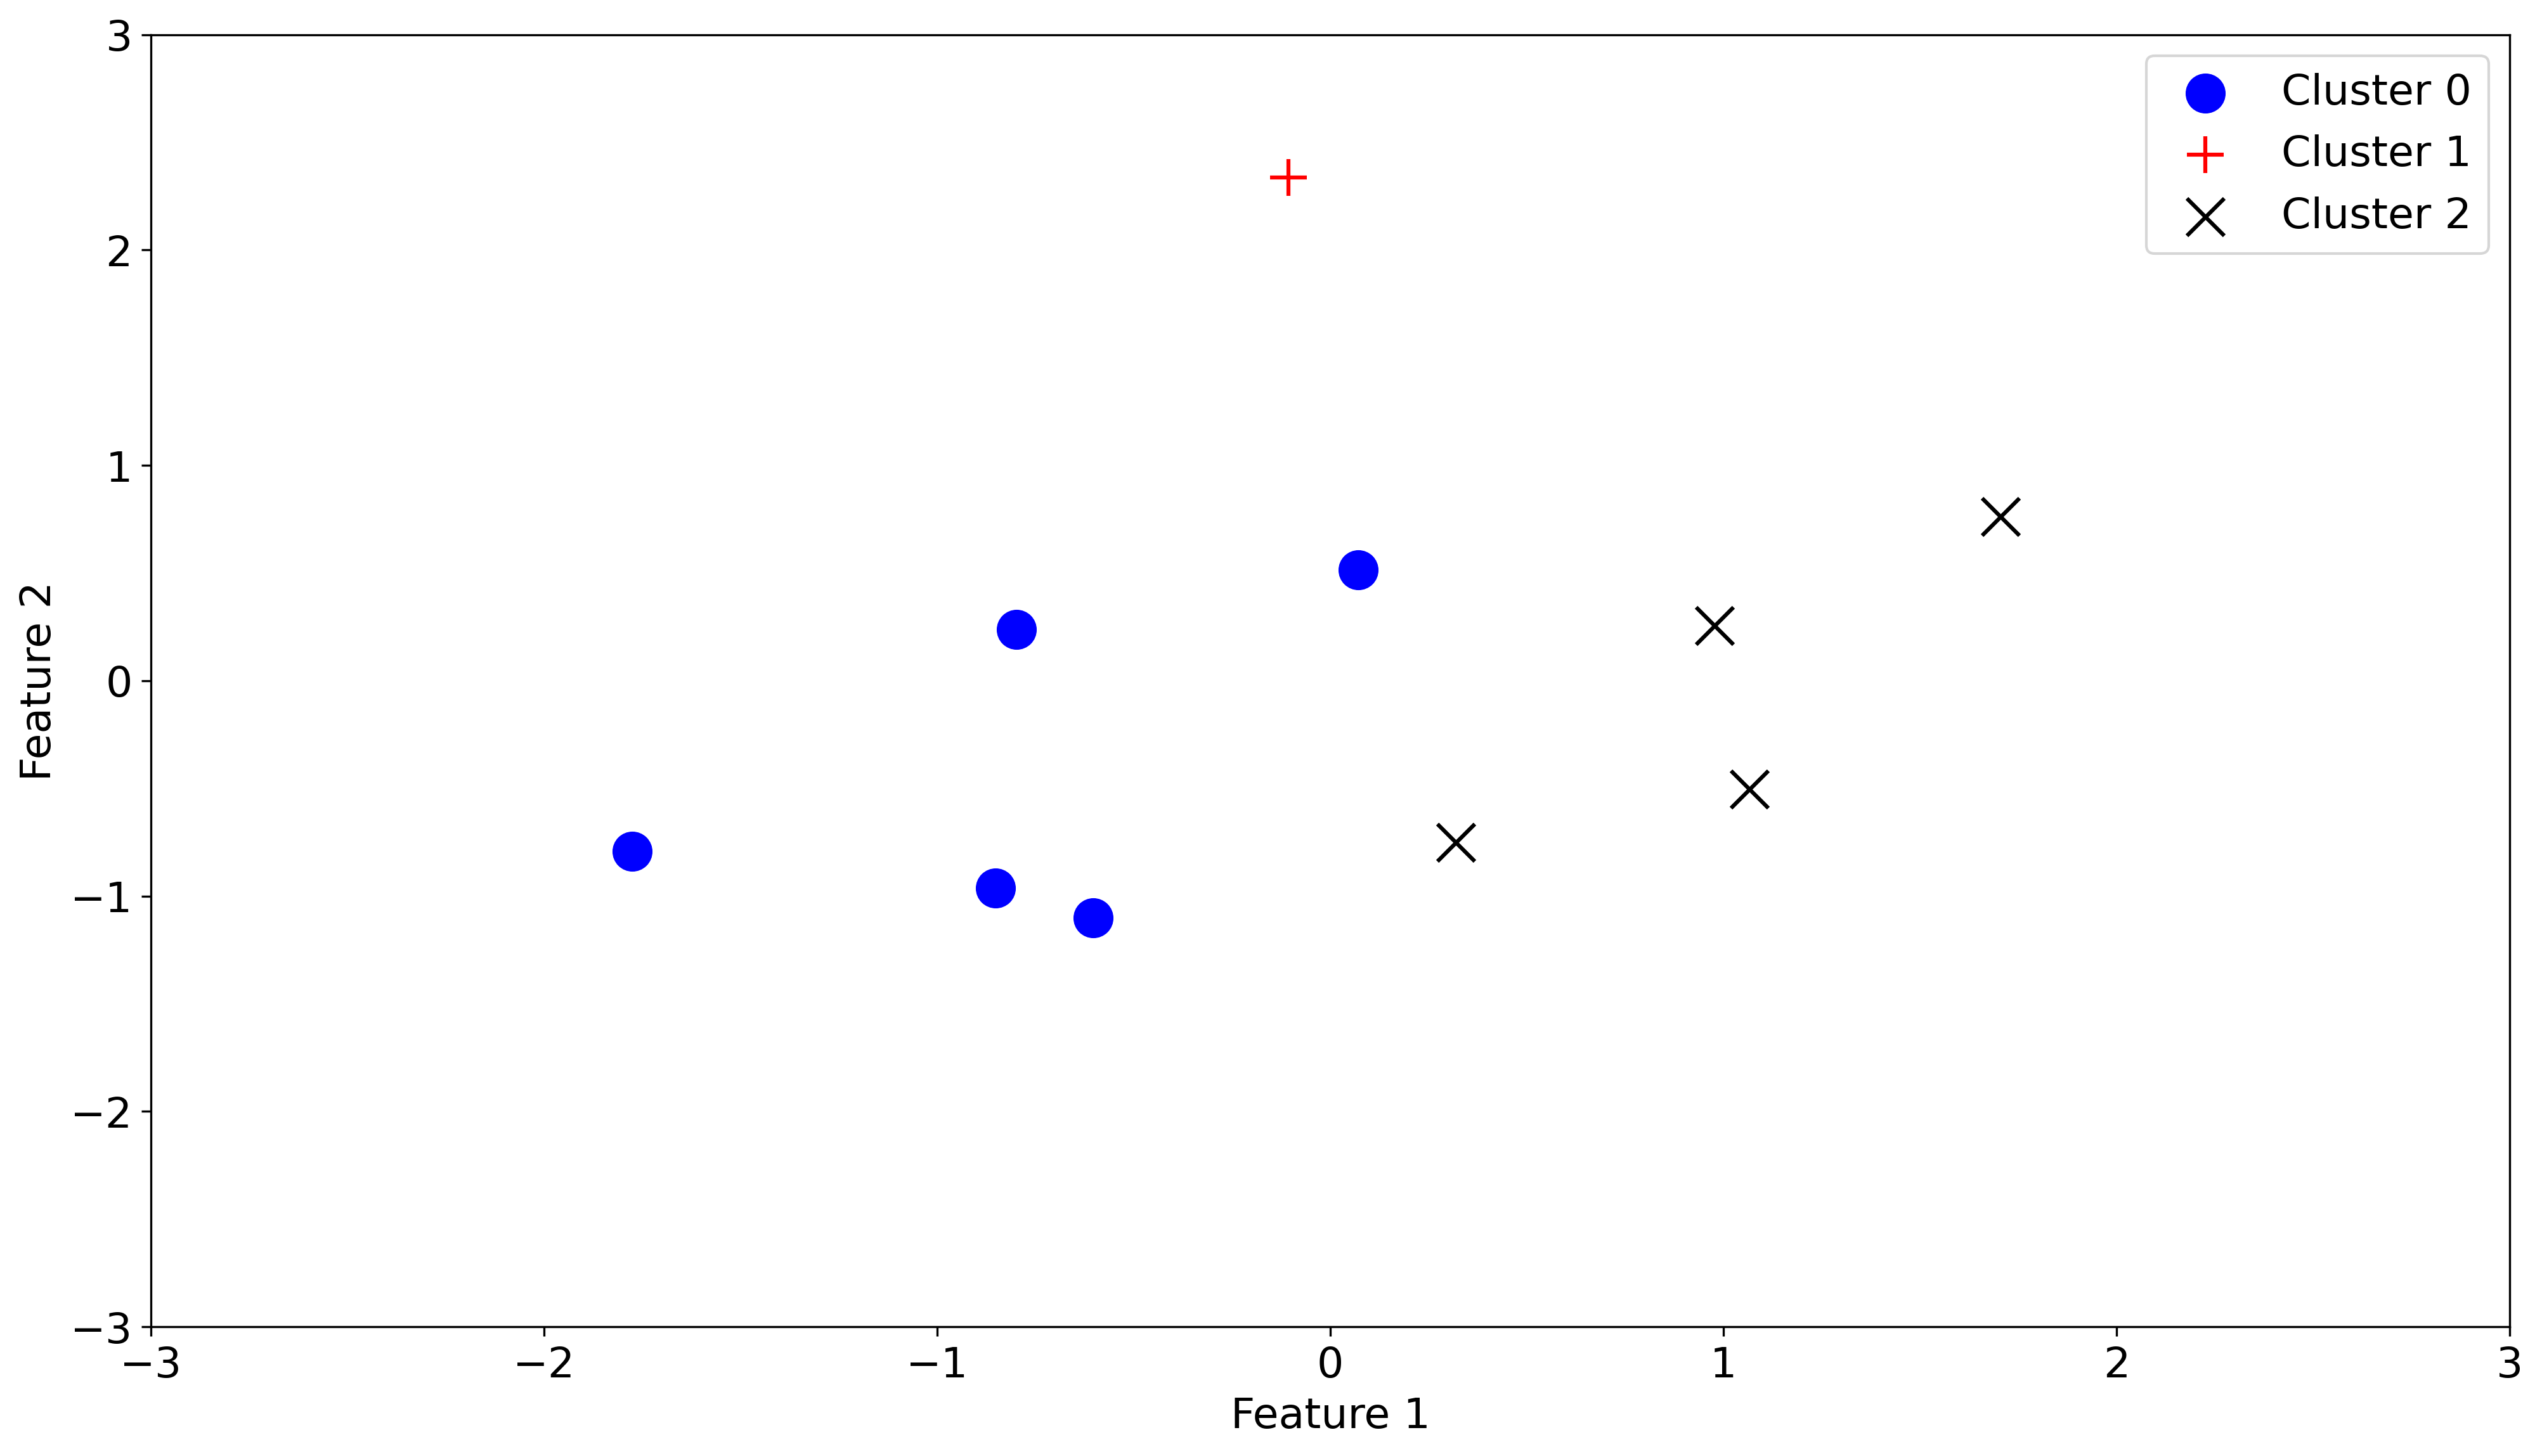

In [19]:
ref_0 = agglo_a.labels_ == 0
ref_1 = agglo_a.labels_ == 1
ref_2 = agglo_a.labels_ == 2

X_train_scaled_0 = X_train_scaled[ref_0,:]
X_train_scaled_1 = X_train_scaled[ref_1,:]
X_train_scaled_2 = X_train_scaled[ref_2,:]

plt.scatter(X_train_scaled_0[:, 0], X_train_scaled_0[:, 1], c='blue', marker='o', s=200, label='Cluster 0')
plt.scatter(X_train_scaled_1[:, 0], X_train_scaled_1[:, 1], c='red', marker='+', s=200, label='Cluster 1')
plt.scatter(X_train_scaled_2[:, 0], X_train_scaled_2[:, 1], c='black', marker='x', s=200, label='Cluster 2')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.show()

# Principal Component Analysis

- **Principal Component Analysis (PCA)**: Method for reducing the number of features
- Idea: Reduce large number of features while maintaining as much of the variation of the original features as possible
- Transformation and conversion of correlated features into a set of of linearly uncorrelated variables (vectors) 
- These are called principal components (PCs) 
- First PC has the highest variation (variance), and so on.    

- Let $\boldsymbol{X}$ be our usual $(n x p)$ feature matrix and $\boldsymbol{\Gamma}$ some properly shaped weighting matrix with dimension $(p x d)$ 
- Then we want to create a $(n x d)$ matrix  $\boldsymbol{Z}$ as

\begin{align*}
\boldsymbol{Z}  &= \boldsymbol{X} \boldsymbol{\Gamma} 
\end{align*}

which captures as much variation of $\boldsymbol{X}$ as possible.

- Eigenvalue decomposition or singular value decomposition

Technically, 

- Standardize data 
- Calculate the covariance matrix
- Compute Eigenvalues  and Eigenvectors of the covariance matrix
- Eigenvector $v$ of a matrix $A$ is a non-zero vector that is only stretched by multiplying with matrix $A$. This multiplier is the scalar factor $\lambda$ (the \textbf{Eigenvalue}). 

\begin{equation*}
A v = \lambda v
\end{equation*}  

Apply Eigenvalue decomposition to a general $(p x p)$ square  matrix $\boldsymbol{A}$ as

\begin{equation*}
\boldsymbol{A} \boldsymbol{\Gamma} = \boldsymbol{\Gamma} \boldsymbol{\Lambda} 
\end{equation*}

where $\boldsymbol{\Gamma}$: $(p x p)$  square matrix whose ith column is the eigenvector $q_i$ of $\boldsymbol{A}$
$\boldsymbol{\Lambda}$: diagonal matrix whose diagonal elements are the corresponding eigenvalues. Off-diagonal elements are zeros. 

Multiply from the right by  $\boldsymbol{\Gamma}^{-1}$: yields factorization of $\boldsymbol{A}$ as

\begin{equation*}
\boldsymbol{A}  = \boldsymbol{\Gamma}  \boldsymbol{\Lambda} \boldsymbol{\Gamma}^{-1}
\end{equation*}

or $\boldsymbol{\Lambda}$ as 

\begin{equation*}
\boldsymbol{\Lambda}  = \boldsymbol{\Gamma}^{-1}  \boldsymbol{A} \boldsymbol{\Gamma}
\end{equation*}



- Let the square $p x p$ (true or empirical) covariance matrix of $p$ centralized random variables $\boldsymbol{X}$ be $\boldsymbol{\Sigma} = \boldsymbol{\Gamma} \boldsymbol{\Lambda} \boldsymbol{\Gamma}^{-1}$
- $\Lambda$ is the diagonal matrix with eigenvalues $\lambda_j$ ($j = 1,...,p$), in descending order as entries
- $\Gamma$ is an orthogonal matrix of the corresponding eigenvectors
- Note that for an orthogonal matrix it holds that $\boldsymbol{\Gamma}^{T}  \boldsymbol{\Gamma} = \boldsymbol{I}$ and $\boldsymbol{\Gamma}^{T} = \boldsymbol{\Gamma}^{-1}$.

- Then

\begin{equation*}
\boldsymbol{\Lambda}  = \boldsymbol{\Gamma}^{-1}  \boldsymbol{\Sigma} \boldsymbol{\Gamma}
\end{equation*}

- and linear transformation  

\begin{equation*}
\boldsymbol{Z} = \boldsymbol{X} \boldsymbol{\Gamma}
\end{equation*}

has covariance matrix $\boldsymbol{\Lambda}$ because

\begin{align*}
Cov(\boldsymbol{Z}) &  = Cov(\boldsymbol{X} \boldsymbol{\Gamma}) = \boldsymbol{\Gamma}^{T} Cov(\boldsymbol{X})
\boldsymbol{\Gamma} \\
& =  \boldsymbol{\Gamma}^{T}  \boldsymbol{\Sigma} \boldsymbol{\Gamma} \\
& = \boldsymbol{\Gamma}^{T}  \boldsymbol{\Gamma} \boldsymbol{\Lambda} \boldsymbol{\Gamma}^{-1} \boldsymbol{\Gamma} \\
& = \boldsymbol{\Lambda} 
\end{align*}


In [22]:
data = data[data['state_orig_time'] != 'VI'] # Virgin Island
data = data[data['state_orig_time'] != 'DC'] # DC
data = data[data['state_orig_time'] != 'PR'] # Puerto Rico
data = data[data['state_orig_time'] != 'nan']

# Drop states with no or only some defaults in the training set (til period 27) or NaN
data = data[data['state_orig_time'] != 'AL']
data = data[data['state_orig_time'] != 'AK']
data = data[data['state_orig_time'] != 'AR']
data = data[data['state_orig_time'] != 'ND']
data = data[data['state_orig_time'] != 'SD']
data = data[data['state_orig_time'] != 'MT']
data = data[data['state_orig_time'] != 'DE']
data = data[data['state_orig_time'] != 'WV']
data = data[data['state_orig_time'] != 'VT']
data = data[data['state_orig_time'] != 'ME']
data = data[data['state_orig_time'] != 'NE']
data = data[data['state_orig_time'] != 'NH']
data = data[data['state_orig_time'] != 'MS']

scaler = StandardScaler()
defaultrates_states1 = data.groupby(['time', 'state_orig_time'])['default_time'].mean().unstack(level=1).add_prefix('defaultrate_').fillna(0) 
defaultrates_states= scaler.fit_transform(defaultrates_states1)

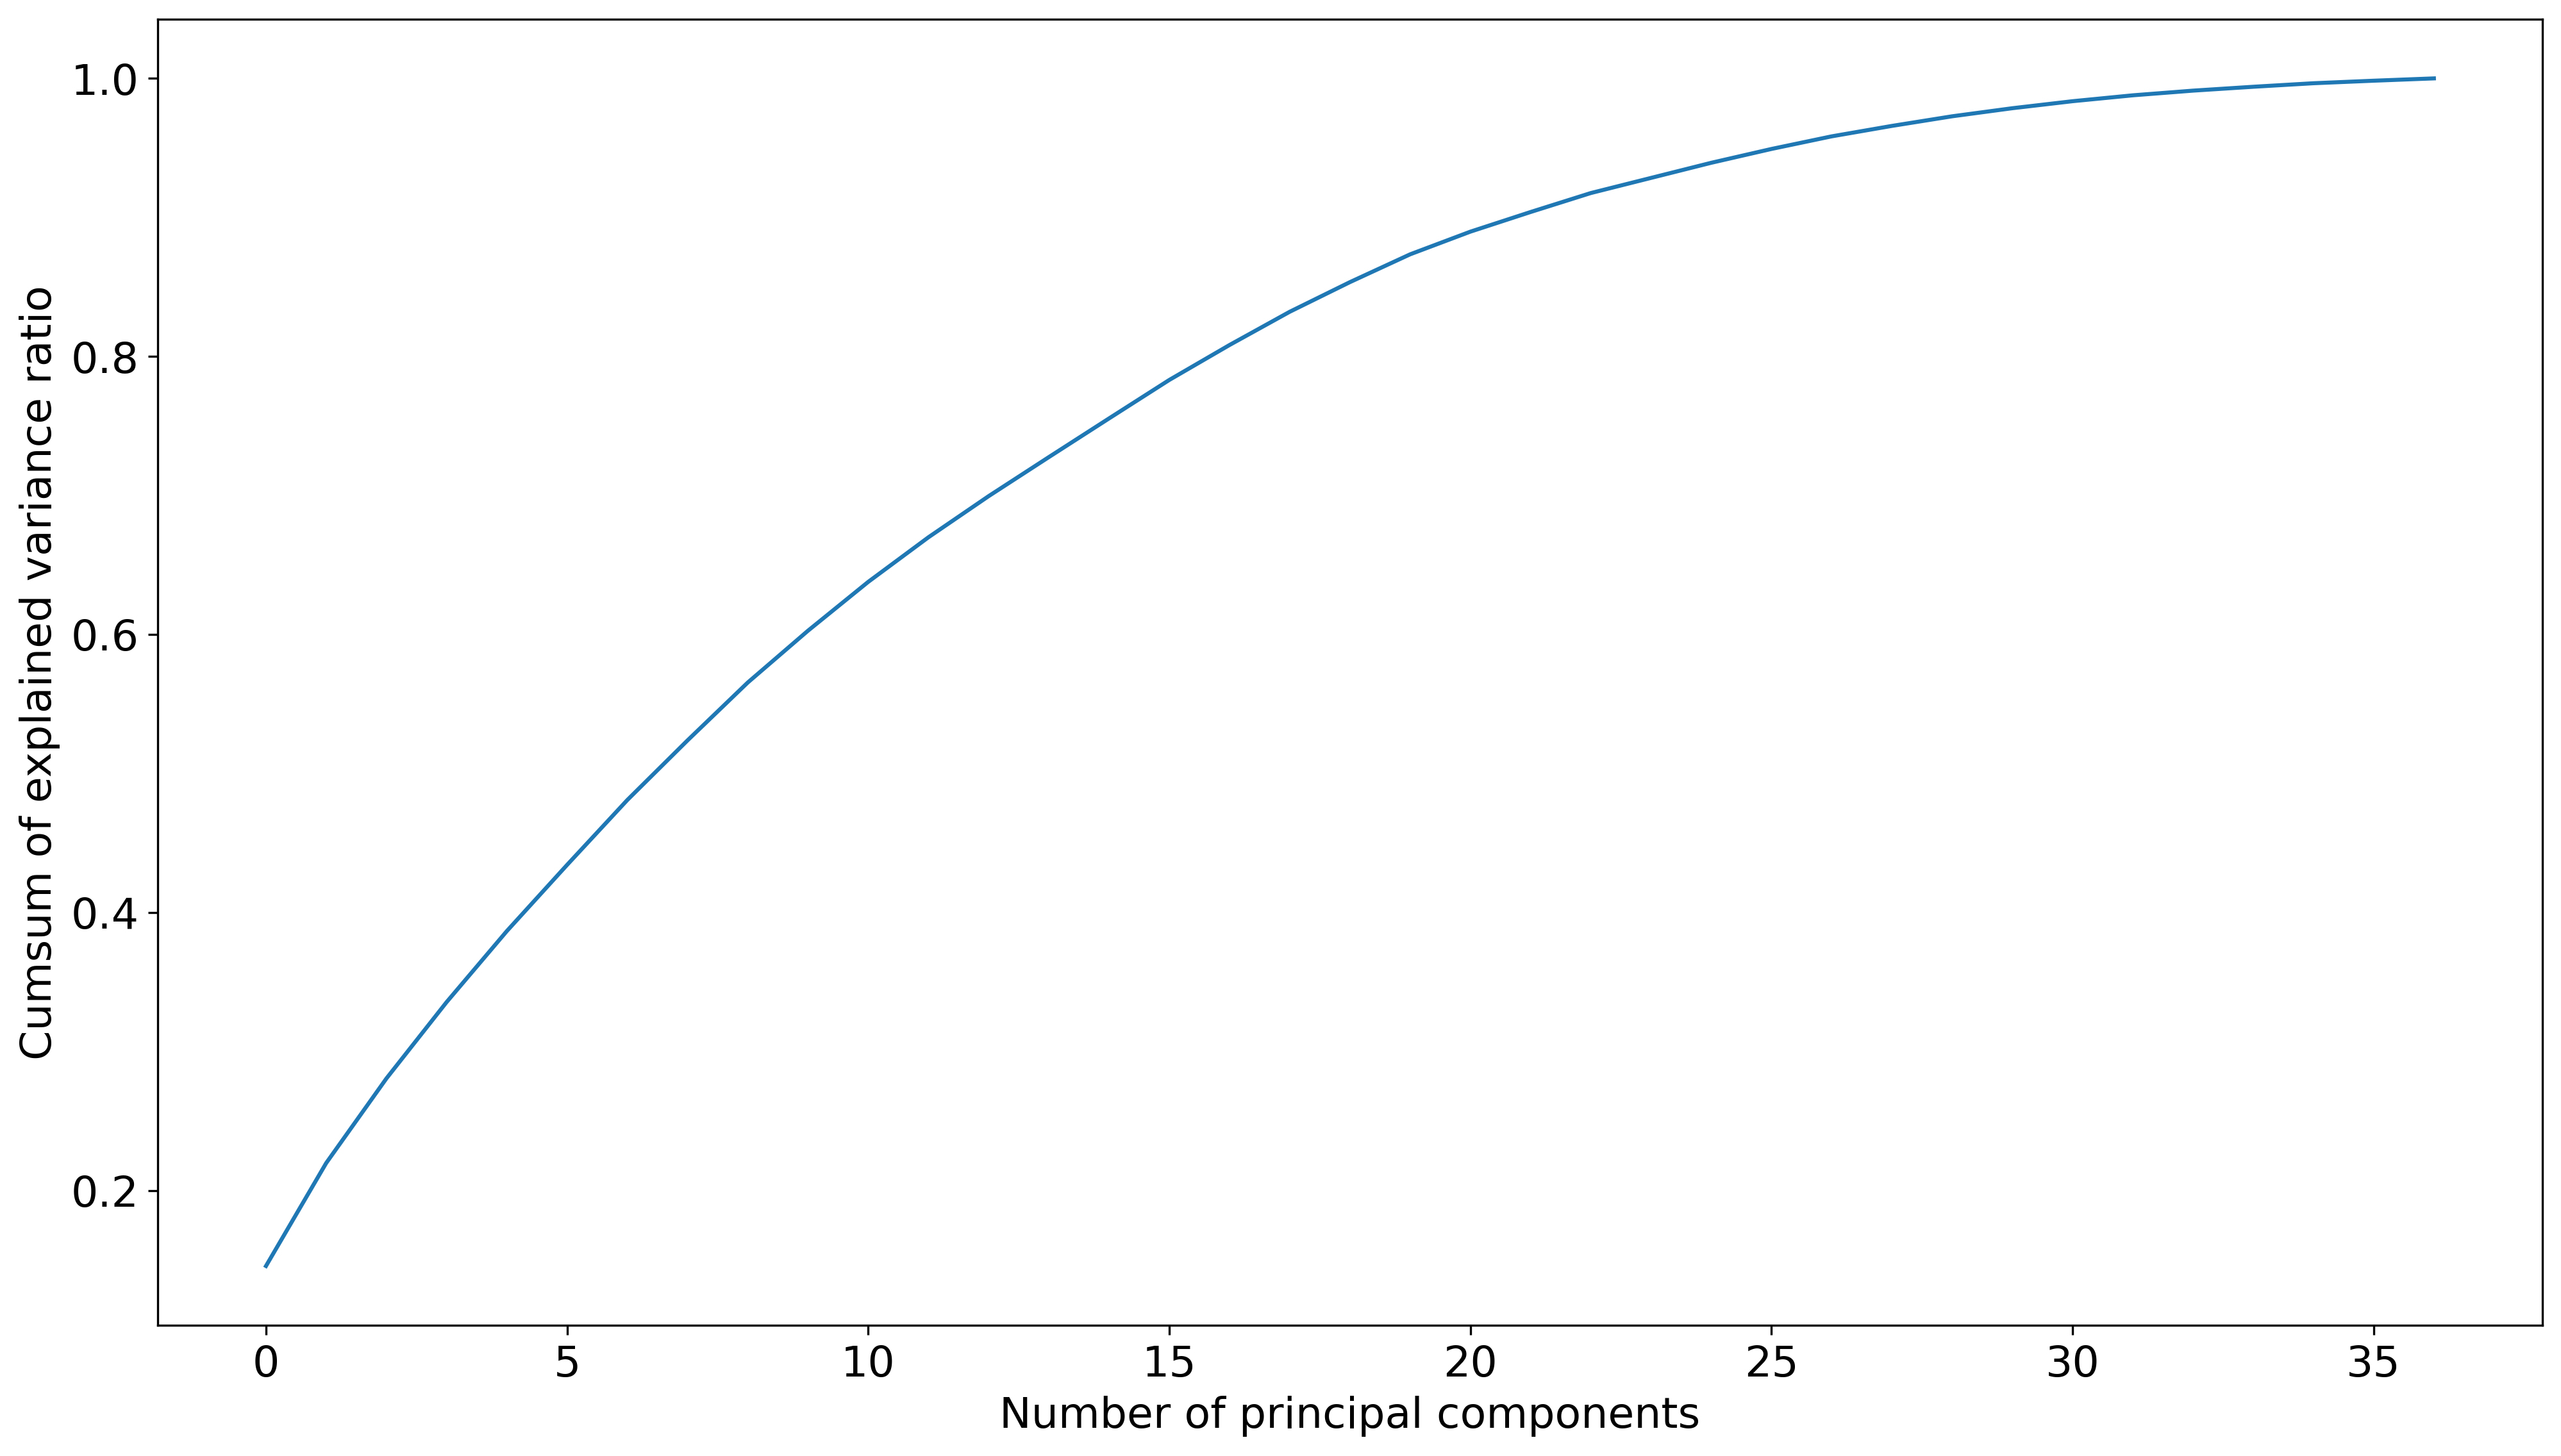

In [23]:
pca = PCA()
pca.fit(defaultrates_states)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of principal components')
plt.ylabel('Cumsum of explained variance ratio')
plt.show()

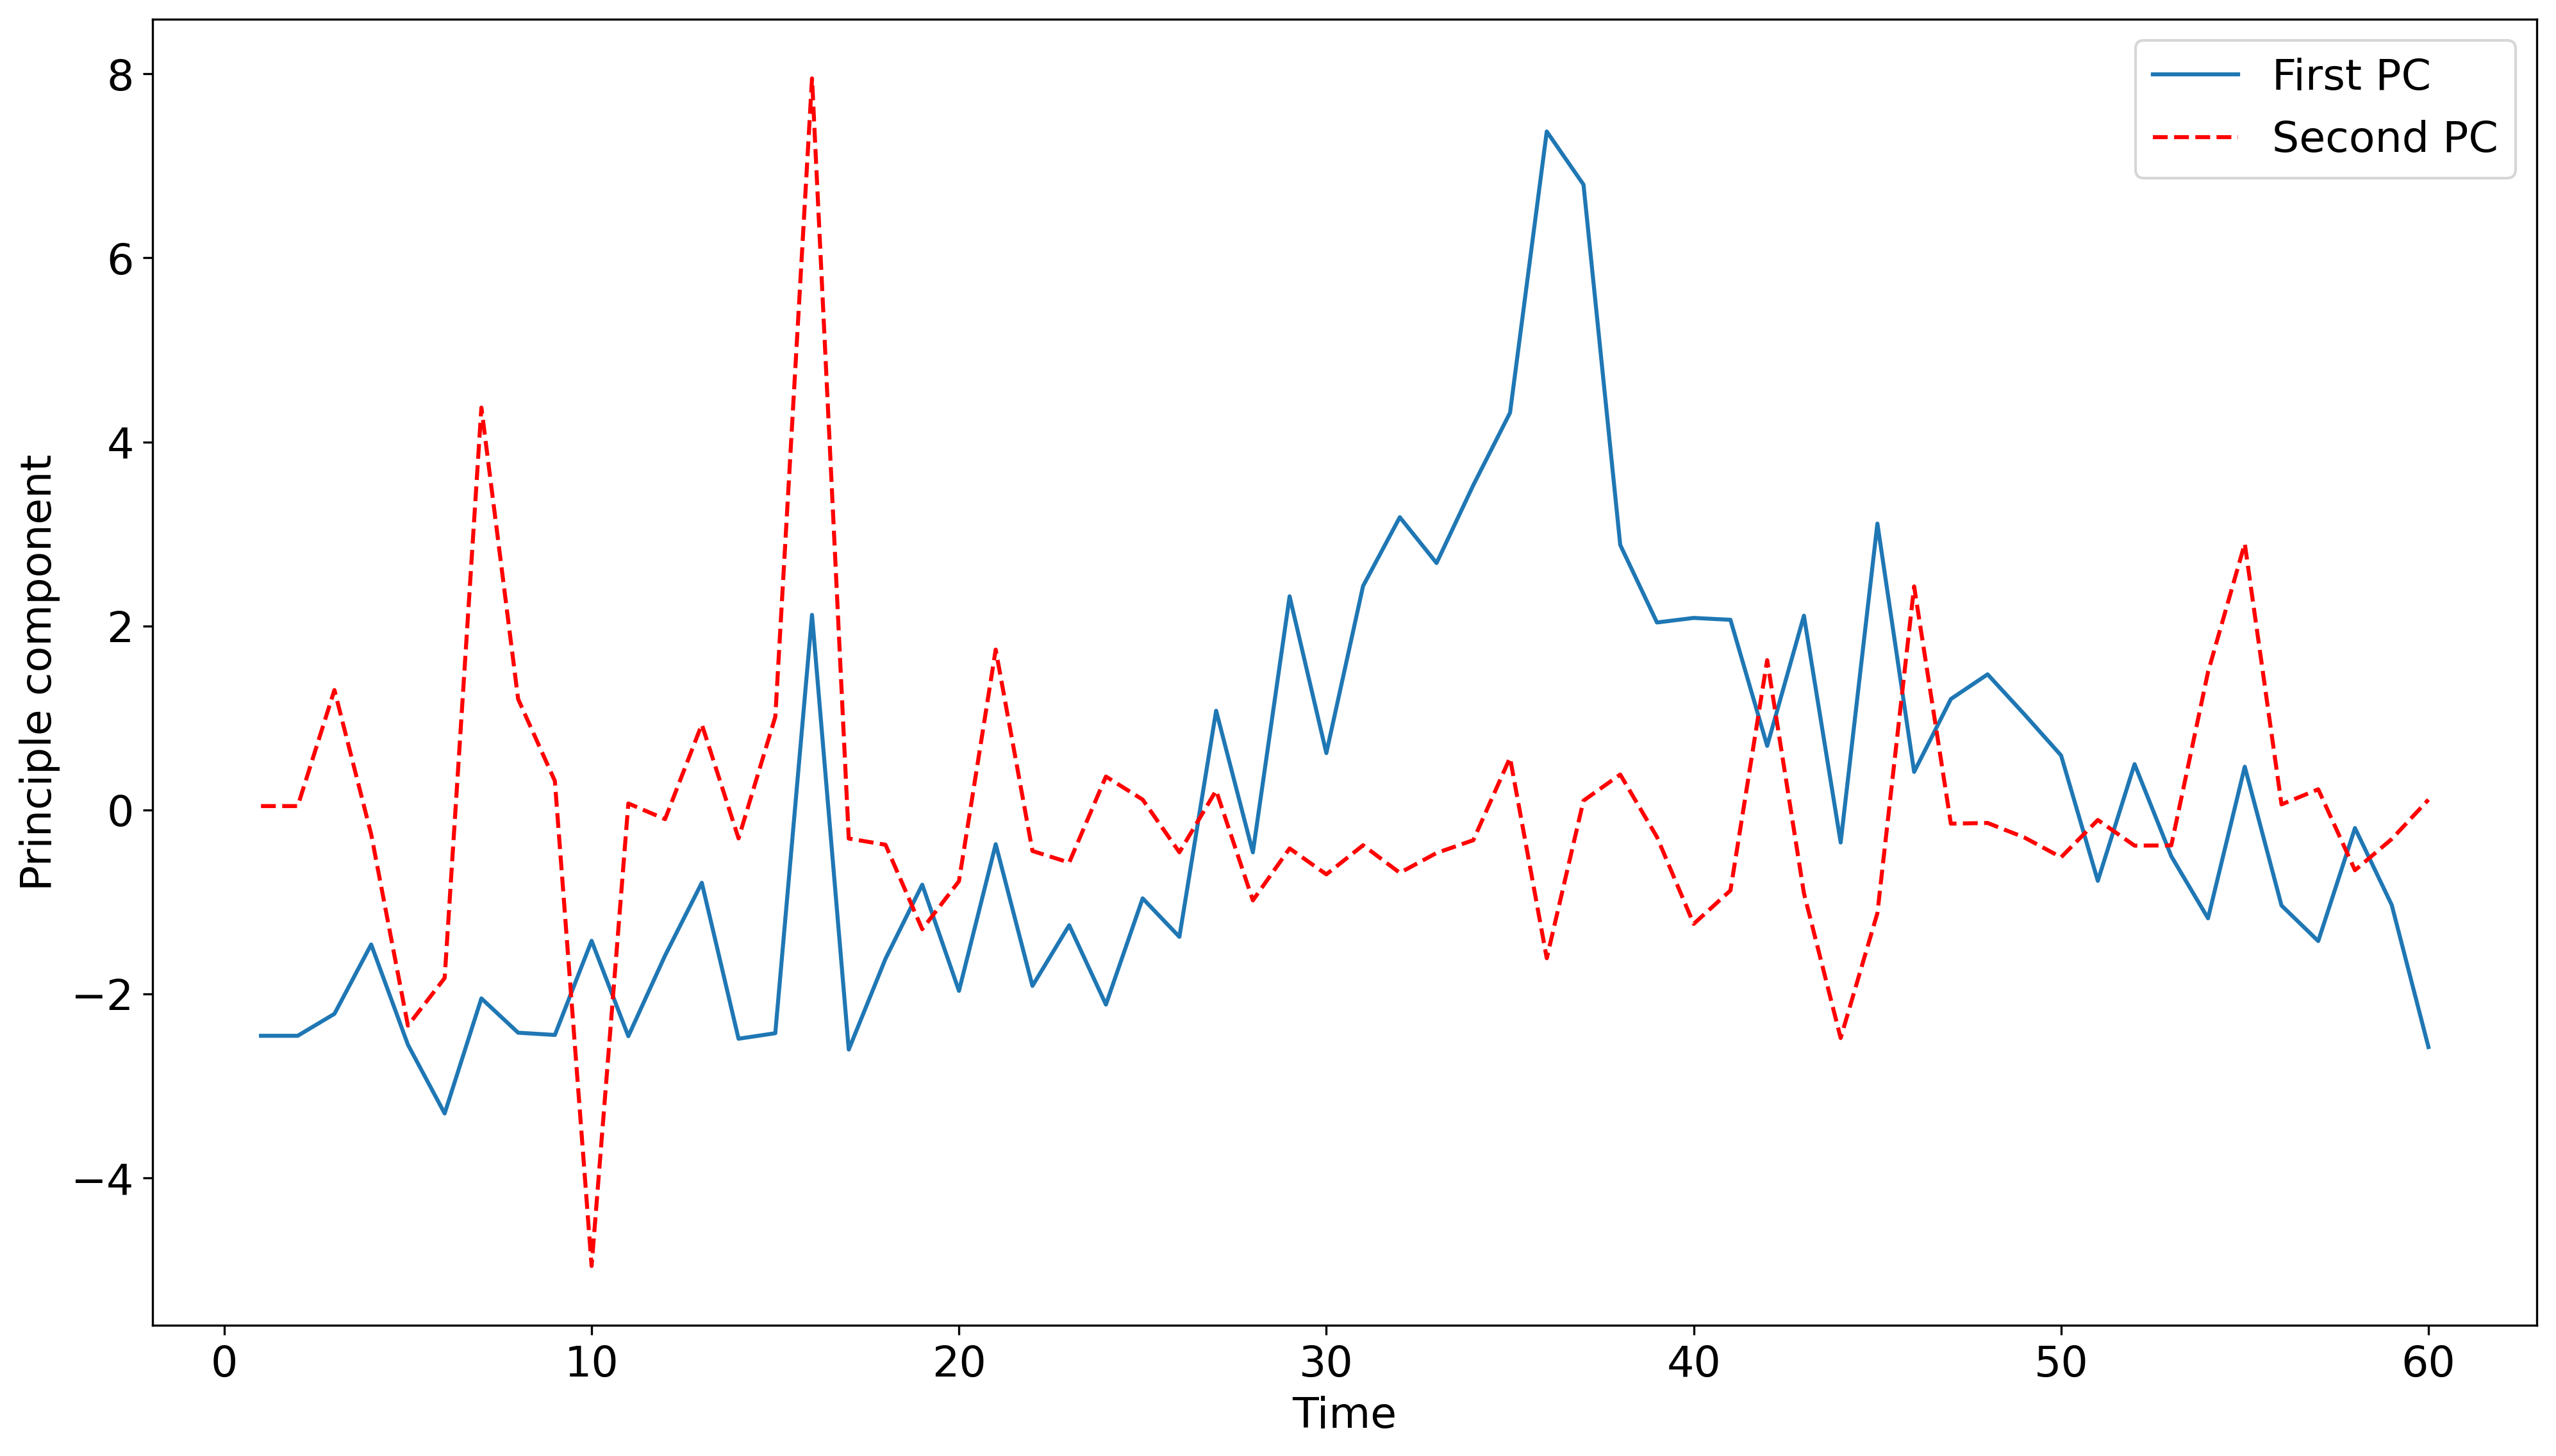

In [26]:
Z = pca.transform(defaultrates_states)

plt.xlabel('Time')
plt.ylabel('Principle component')
plt.plot(defaultrates_states1.index, Z[:,0], alpha=1, label="First PC")
plt.plot(defaultrates_states1.index, Z[:,1], alpha=1, color = 'red', linestyle='dashed', label="Second PC")
plt.legend(loc='best')
plt.show()

# Function `dataprep`

 - K-Means clustering with `n_clusters=3`, fitted to the scaled training data 
 - Principal Component Analysis
 

In [27]:
data, data_train, data_test, X_train_scaled, X_test_scaled, y_train, y_test=dataprep(data, depvar='default_time', splitvar='time', threshold=26)

# Sandbox Problems

 - Split the data into observations before and after `time=27`. Use the earlier sample to build a clustering model using three features of your choice and the later to assign clusters.

# Copyright and Disclaimer

Copyright: The workshop resources (handbook and codes) provided to you by Deep Credit Risk are
protected by copyright. You are not permitted to distribute or re-use the workshop materials for
commercial purposes without permission of Deep Credit Risk.

Limit of Liability/Disclaimer of Warranty: While the authors and Deep Credit Risk have used their best effort
in preparing this material, they make no representations or warranties with respect to
the accuracy or completeness of the contents and specifically disclaim any implied
warranties of merchantability or fitness for a particular purpose. No warranty may be
created or extended by sales representatives or written sales materials. The advise and
strategies contained herein may not be suitable for your situation. The authors and Deep Credit Risk shall not
be liable for any loss of profit or any other commercial damages, including but not
limited to special, incidental, consequential, or other damages.